# Credit Risk Data Exploration

## Overview
This notebook performs comprehensive exploratory data analysis (EDA) on the credit risk dataset. We will:

1. **Data Loading**: Load the training dataset from CSV
2. **Data Summary**: Generate descriptive statistics and data quality metrics
3. **Data Visualization**: Create various charts and graphs to understand data distributions and relationships
4. **Insights**: Extract key insights to inform model development

## Dataset
- **Source**: `/mnt/data/Credit-Risk-Model/data/train_data_10.csv`
- **Purpose**: Credit risk modeling and default prediction

Let's begin our exploration!

## 1. Data Loading and Initial Setup

First, let's import the necessary libraries and load our dataset.

In [47]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [48]:
# Load the dataset
data_path = "/mnt/data/Credit-Risk-Model/data/train_data_10.csv"

try:
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}")
    # Show available files for debugging
    import os
    if os.path.exists("/mnt/data/Credit-Risk-Model/data/"):
        print("Available files in data directory:")
        for file in os.listdir("/mnt/data/Credit-Risk-Model/data/"):
            if file.endswith('.csv'):
                print(f"  - {file}")
except Exception as e:
    print(f"Error loading data: {e}")

Dataset loaded successfully!
Shape: (100000, 62)
Columns: ['duration', 'credit_amount', 'installment_rate', 'residence', 'age', 'credits', 'dependents', 'checking_account_A11', 'checking_account_A12', 'checking_account_A13', 'checking_account_A14', 'credit_history_A30', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65', 'employment_since_A71', 'employment_since_A72', 'employment_since_A73', 'employment_since_A74', 'employment_since_A75', 'status_A91', 'status_A92', 'status_A93', 'status_A94', 'debtors_guarantors_A101', 'debtors_guarantors_A102', 'debtors_guarantors_A103', 'property_A121', 'property_A122', 'property_A123', 'property_A124', 'other_installments_A141', 'other_installments_A142', 'other_installments_A143', 'housing_

## 2. Data Summary and Quality Assessment

Let's examine the structure, quality, and basic statistics of our dataset.

In [49]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print()

# Display first few rows
print("=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== LAST 5 ROWS ===")
display(df.tail())

=== DATASET OVERVIEW ===
Dataset shape: (100000, 62)
Memory usage: 47.30 MB

=== FIRST 5 ROWS ===


,duration,credit_amount,installment_rate,residence,age,credits,dependents,checking_account_A11,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employment_since_A71,employment_since_A72,employment_since_A73,employment_since_A74,employment_since_A75,status_A91,status_A92,status_A93,status_A94,debtors_guarantors_A101,debtors_guarantors_A102,debtors_guarantors_A103,property_A121,property_A122,property_A123,property_A124,other_installments_A141,other_installments_A142,other_installments_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,credit
0,0.294118,0.178167,0.666667,1.000000,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,0.294118,0.246836,0.333333,1.000000,0.107143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,0.205882,0.179322,1.000000,0.000000,0.107143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,0.073529,0.091834,1.000000,0.666667,0.285714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
4,0.294118,0.209475,0.666667,0.666667,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0



=== LAST 5 ROWS ===


,duration,credit_amount,installment_rate,residence,age,credits,dependents,checking_account_A11,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employment_since_A71,employment_since_A72,employment_since_A73,employment_since_A74,employment_since_A75,status_A91,status_A92,status_A93,status_A94,debtors_guarantors_A101,debtors_guarantors_A102,debtors_guarantors_A103,property_A121,property_A122,property_A123,property_A124,other_installments_A141,other_installments_A142,other_installments_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,credit
99995,0.294118,0.036591,1.000000,0.333333,0.017857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
99996,0.470588,0.108672,1.000000,1.000000,0.678571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
99997,0.294118,0.037911,1.000000,0.333333,0.053571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
99998,0.117647,0.025806,0.333333,0.333333,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
99999,0.117647,0.025806,0.333333,0.333333,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [50]:
# Missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("Missing values summary:")
display(missing_df[missing_df['Missing Count'] > 0])

# Store missing count for use in later cells
missing_count = missing_df['Missing Count'].sum()
if missing_count == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(f"Total missing values: {missing_count}")
    print(f"Columns with missing values: {(missing_df['Missing Count'] > 0).sum()}")

=== MISSING VALUES ANALYSIS ===
Missing values summary:


,Column,Missing Count,Missing Percentage


✓ No missing values found in the dataset!


In [51]:
# Descriptive statistics for numerical columns
print("=== DESCRIPTIVE STATISTICS ===")

if len(numeric_cols) > 0:
    print("Numerical columns statistics:")
    display(df[numeric_cols].describe().round(3))
    
    print("\n=== ADDITIONAL STATISTICS ===")
    additional_stats = pd.DataFrame({
        'Skewness': df[numeric_cols].skew(),
        'Kurtosis': df[numeric_cols].kurtosis(),
        'Min': df[numeric_cols].min(),
        'Max': df[numeric_cols].max(),
        'Range': df[numeric_cols].max() - df[numeric_cols].min()
    }).round(3)
    display(additional_stats)
else:
    print("No numerical columns found for statistical analysis.")

=== DESCRIPTIVE STATISTICS ===
Numerical columns statistics:


,duration,credit_amount,installment_rate,residence,age,credits,dependents,checking_account_A11,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employment_since_A71,employment_since_A72,employment_since_A73,employment_since_A74,employment_since_A75,status_A91,status_A92,status_A93,status_A94,debtors_guarantors_A101,debtors_guarantors_A102,debtors_guarantors_A103,property_A121,property_A122,property_A123,property_A124,other_installments_A141,other_installments_A142,other_installments_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,credit
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.00,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.0
mean,0.250,0.141,0.668,0.581,0.247,0.102,0.120,0.290,0.295,0.039,0.363,0.027,0.037,0.561,0.073,0.212,0.173,0.056,0.012,0.154,0.207,0.015,0.017,0.039,0.007,0.083,0.610,0.071,0.049,0.054,0.151,0.032,0.159,0.268,0.159,0.185,0.034,0.278,0.51,0.059,0.924,0.037,0.032,0.220,0.183,0.332,0.139,0.107,0.029,0.827,0.161,0.732,0.095,0.012,0.168,0.617,0.102,0.576,0.381,0.973,0.027,0.5
std,0.179,0.156,0.360,0.351,0.205,0.178,0.324,0.454,0.456,0.194,0.481,0.162,0.188,0.496,0.260,0.409,0.378,0.230,0.110,0.361,0.405,0.120,0.130,0.194,0.085,0.276,0.488,0.256,0.215,0.225,0.358,0.175,0.365,0.443,0.365,0.389,0.182,0.448,0.50,0.235,0.264,0.188,0.175,0.414,0.387,0.471,0.346,0.310,0.169,0.378,0.368,0.443,0.293,0.110,0.374,0.486,0.303,0.494,0.486,0.162,0.162,0.5
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
25%,0.118,0.049,0.333,0.333,0.089,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.0
50%,0.206,0.072,0.667,0.667,0.196,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.0
75%,0.294,0.179,1.000,1.000,0.321,0.333,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.00,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.0
max,0.824,0.864,1.000,1.000,0.982,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


=== ADDITIONAL STATISTICS ===


,Skewness,Kurtosis,Min,Max,Range
duration,1.105,0.686,0.0,0.824,0.824
credit_amount,2.313,5.853,0.0,0.864,0.864
installment_rate,-0.533,-1.164,0.0,1.000,1.000
residence,-0.065,-1.345,0.0,1.000,1.000
age,1.325,1.234,0.0,0.982,0.982
...,...,...,...,...,...
telephone_A191,-0.306,-1.906,0.0,1.000,1.000
telephone_A192,0.492,-1.758,0.0,1.000,1.000
foreign_worker_A201,-5.855,32.287,0.0,1.000,1.000
foreign_worker_A202,5.855,32.287,0.0,1.000,1.000


In [52]:
# Categorical columns analysis
print("=== CATEGORICAL COLUMNS ANALYSIS ===")

if len(categorical_cols) > 0:
    for col in categorical_cols[:10]:  # Show first 10 categorical columns
        print(f"\n--- {col} ---")
        value_counts = df[col].value_counts()
        print(f"Unique values: {df[col].nunique()}")
        print(f"Most frequent values:")
        display(value_counts.head())
        
        if df[col].nunique() > 20:
            print(f"... and {df[col].nunique() - 5} more unique values")
else:
    print("No categorical columns found in the dataset.")

=== CATEGORICAL COLUMNS ANALYSIS ===
No categorical columns found in the dataset.


## 3. Data Visualizations

Now let's create various visualizations to better understand the data distributions, relationships, and patterns.

### 3.1 Target Variable Analysis

First, let's examine the target variable (if it exists) and understand the class distribution.

In [53]:
# Identify potential target variable (common names for credit risk)
potential_targets = ['target', 'default', 'class', 'label', 'outcome', 'risk', 'y']
target_col = None

for col in df.columns:
    if col.lower() in potential_targets:
        target_col = col
        break

if target_col:
    print(f"Identified target variable: {target_col}")
    
    # Target variable distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Count plot
    df[target_col].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title(f'Distribution of {target_col}')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel('Count')
    
    # Pie chart
    df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
    axes[1].set_title(f'Proportion of {target_col}')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nTarget variable statistics:")
    target_stats = df[target_col].value_counts()
    for value, count in target_stats.items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count} ({percentage:.1f}%)")
        
else:
    print("No obvious target variable found. Examining all binary/categorical columns:")
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]
    if binary_cols:
        print(f"Binary columns that might be targets: {binary_cols}")
    else:
        print("No binary columns found.")

No obvious target variable found. Examining all binary/categorical columns:
Binary columns that might be targets: ['dependents', 'checking_account_A11', 'checking_account_A12', 'checking_account_A13', 'checking_account_A14', 'credit_history_A30', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65', 'employment_since_A71', 'employment_since_A72', 'employment_since_A73', 'employment_since_A74', 'employment_since_A75', 'status_A91', 'status_A92', 'status_A93', 'status_A94', 'debtors_guarantors_A101', 'debtors_guarantors_A102', 'debtors_guarantors_A103', 'property_A121', 'property_A122', 'property_A123', 'property_A124', 'other_installments_A141', 'other_installments_A142', 'other_installments_A143', 'housing_A151', 'housing_A152', '

### 3.2 Numerical Variable Distributions

Let's examine the distributions of numerical variables using histograms and box plots.

=== NUMERICAL FEATURES SUMMARY ===


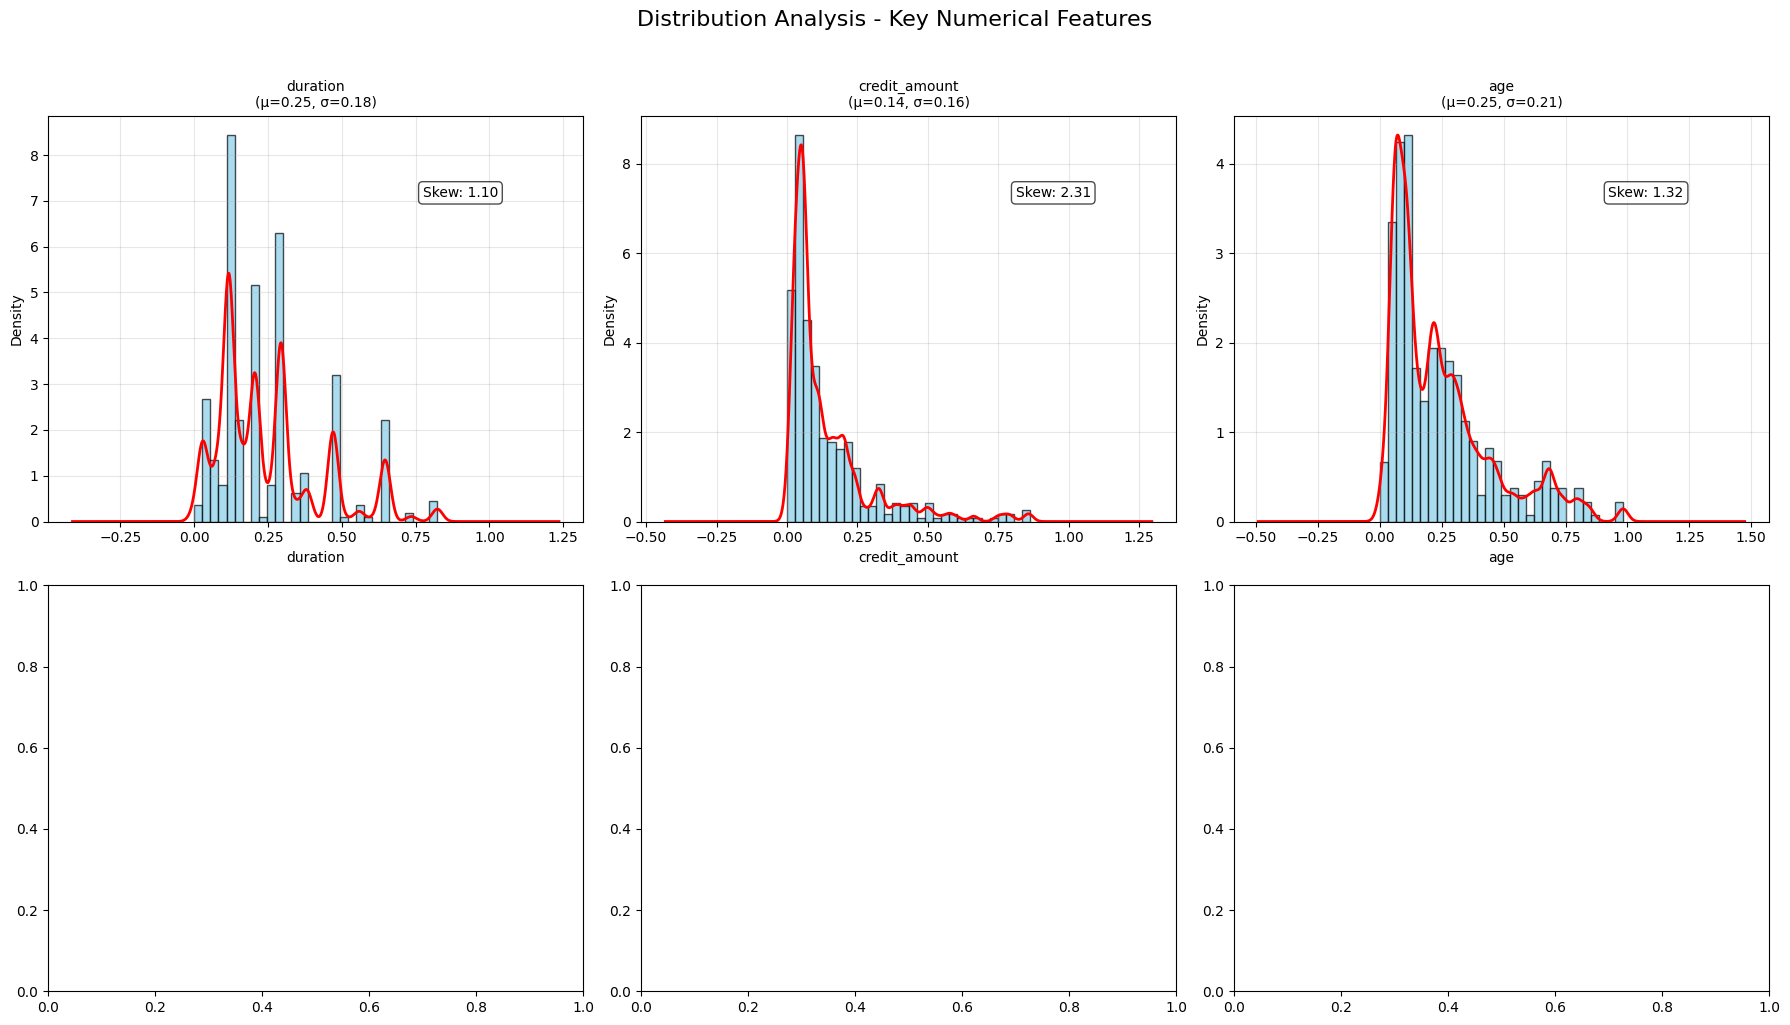


Summary Statistics for Key Numerical Features:


,duration,credit_amount,age
count,100000.00,100000.00,100000.00
mean,0.25,0.14,0.25
std,0.18,0.16,0.21
min,0.00,0.00,0.00
25%,0.12,0.05,0.09
50%,0.21,0.07,0.20
75%,0.29,0.18,0.32
max,0.82,0.86,0.98
skewness,1.10,2.31,1.32
kurtosis,0.69,5.85,1.23



=== BINARY FEATURES ANALYSIS (56 features) ===


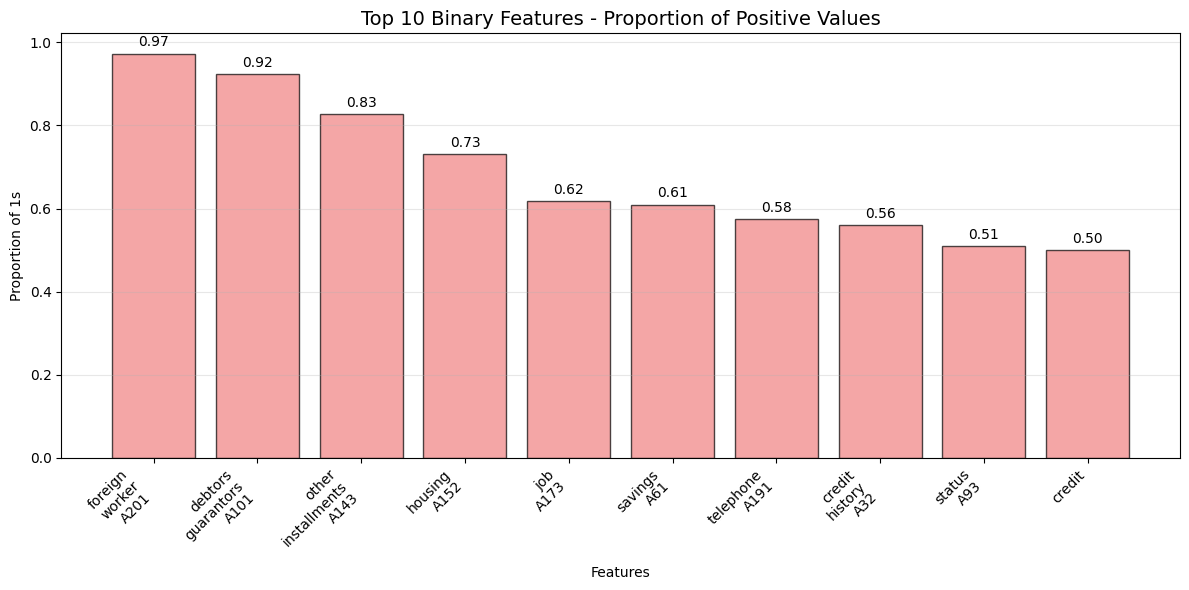

Total binary features: 56
Features with >50% positive values: 10
Features with <10% positive values: 23


In [54]:
# Summary distribution analysis for numerical variables
if len(numeric_cols) > 0:
    # Create a single summary plot with key numerical features
    print("=== NUMERICAL FEATURES SUMMARY ===")
    
    # Select key continuous features (first 7 columns that are not binary)
    continuous_cols = []
    for col in numeric_cols:
        unique_vals = df[col].nunique()
        if unique_vals > 10:  # Not binary/categorical
            continuous_cols.append(col)
        if len(continuous_cols) >= 6:  # Limit to 6 for readability
            break
    
    if continuous_cols:
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        axes = axes.flatten()
        
        for i, col in enumerate(continuous_cols):
            # Histogram with KDE
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, density=True, color='skyblue', edgecolor='black')
            df[col].plot(kind='kde', ax=axes[i], color='red', linewidth=2)
            axes[i].set_title(f'{col}\n(μ={df[col].mean():.2f}, σ={df[col].std():.2f})', fontsize=10)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Density')
            axes[i].grid(True, alpha=0.3)
            
            # Add skewness info
            skew_val = df[col].skew()
            axes[i].text(0.7, 0.8, f'Skew: {skew_val:.2f}', 
                        transform=axes[i].transAxes, 
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
        
        plt.suptitle('Distribution Analysis - Key Numerical Features', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
        
        # Summary statistics table
        print("\nSummary Statistics for Key Numerical Features:")
        summary_stats = df[continuous_cols].describe().round(2)
        summary_stats.loc['skewness'] = df[continuous_cols].skew().round(2)
        summary_stats.loc['kurtosis'] = df[continuous_cols].kurtosis().round(2)
        display(summary_stats)
    
    # Create a separate chart for binary/categorical numerical features
    binary_cols = [col for col in numeric_cols if df[col].nunique() == 2]
    if binary_cols:
        print(f"\n=== BINARY FEATURES ANALYSIS ({len(binary_cols)} features) ===")
        
        # Count how many 1s vs 0s for each binary feature
        binary_summary = {}
        for col in binary_cols:
            counts = df[col].value_counts()
            binary_summary[col] = counts.get(1.0, 0) / len(df)
        
        # Plot top 10 binary features by proportion of 1s
        top_binary = sorted(binary_summary.items(), key=lambda x: x[1], reverse=True)[:10]
        
        plt.figure(figsize=(12, 6))
        cols_plot = [item[0] for item in top_binary]
        props_plot = [item[1] for item in top_binary]
        
        bars = plt.bar(range(len(cols_plot)), props_plot, color='lightcoral', alpha=0.7, edgecolor='black')
        plt.title('Top 10 Binary Features - Proportion of Positive Values', fontsize=14)
        plt.xlabel('Features')
        plt.ylabel('Proportion of 1s')
        plt.xticks(range(len(cols_plot)), [col.replace('_', '\n') for col in cols_plot], rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.2f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        print(f"Total binary features: {len(binary_cols)}")
        print(f"Features with >50% positive values: {len([x for x in binary_summary.values() if x > 0.5])}")
        print(f"Features with <10% positive values: {len([x for x in binary_summary.values() if x < 0.1])}")

else:
    print("No numerical columns found for distribution analysis.")

=== MULTI-DIMENSIONAL FEATURE RELATIONSHIPS ===


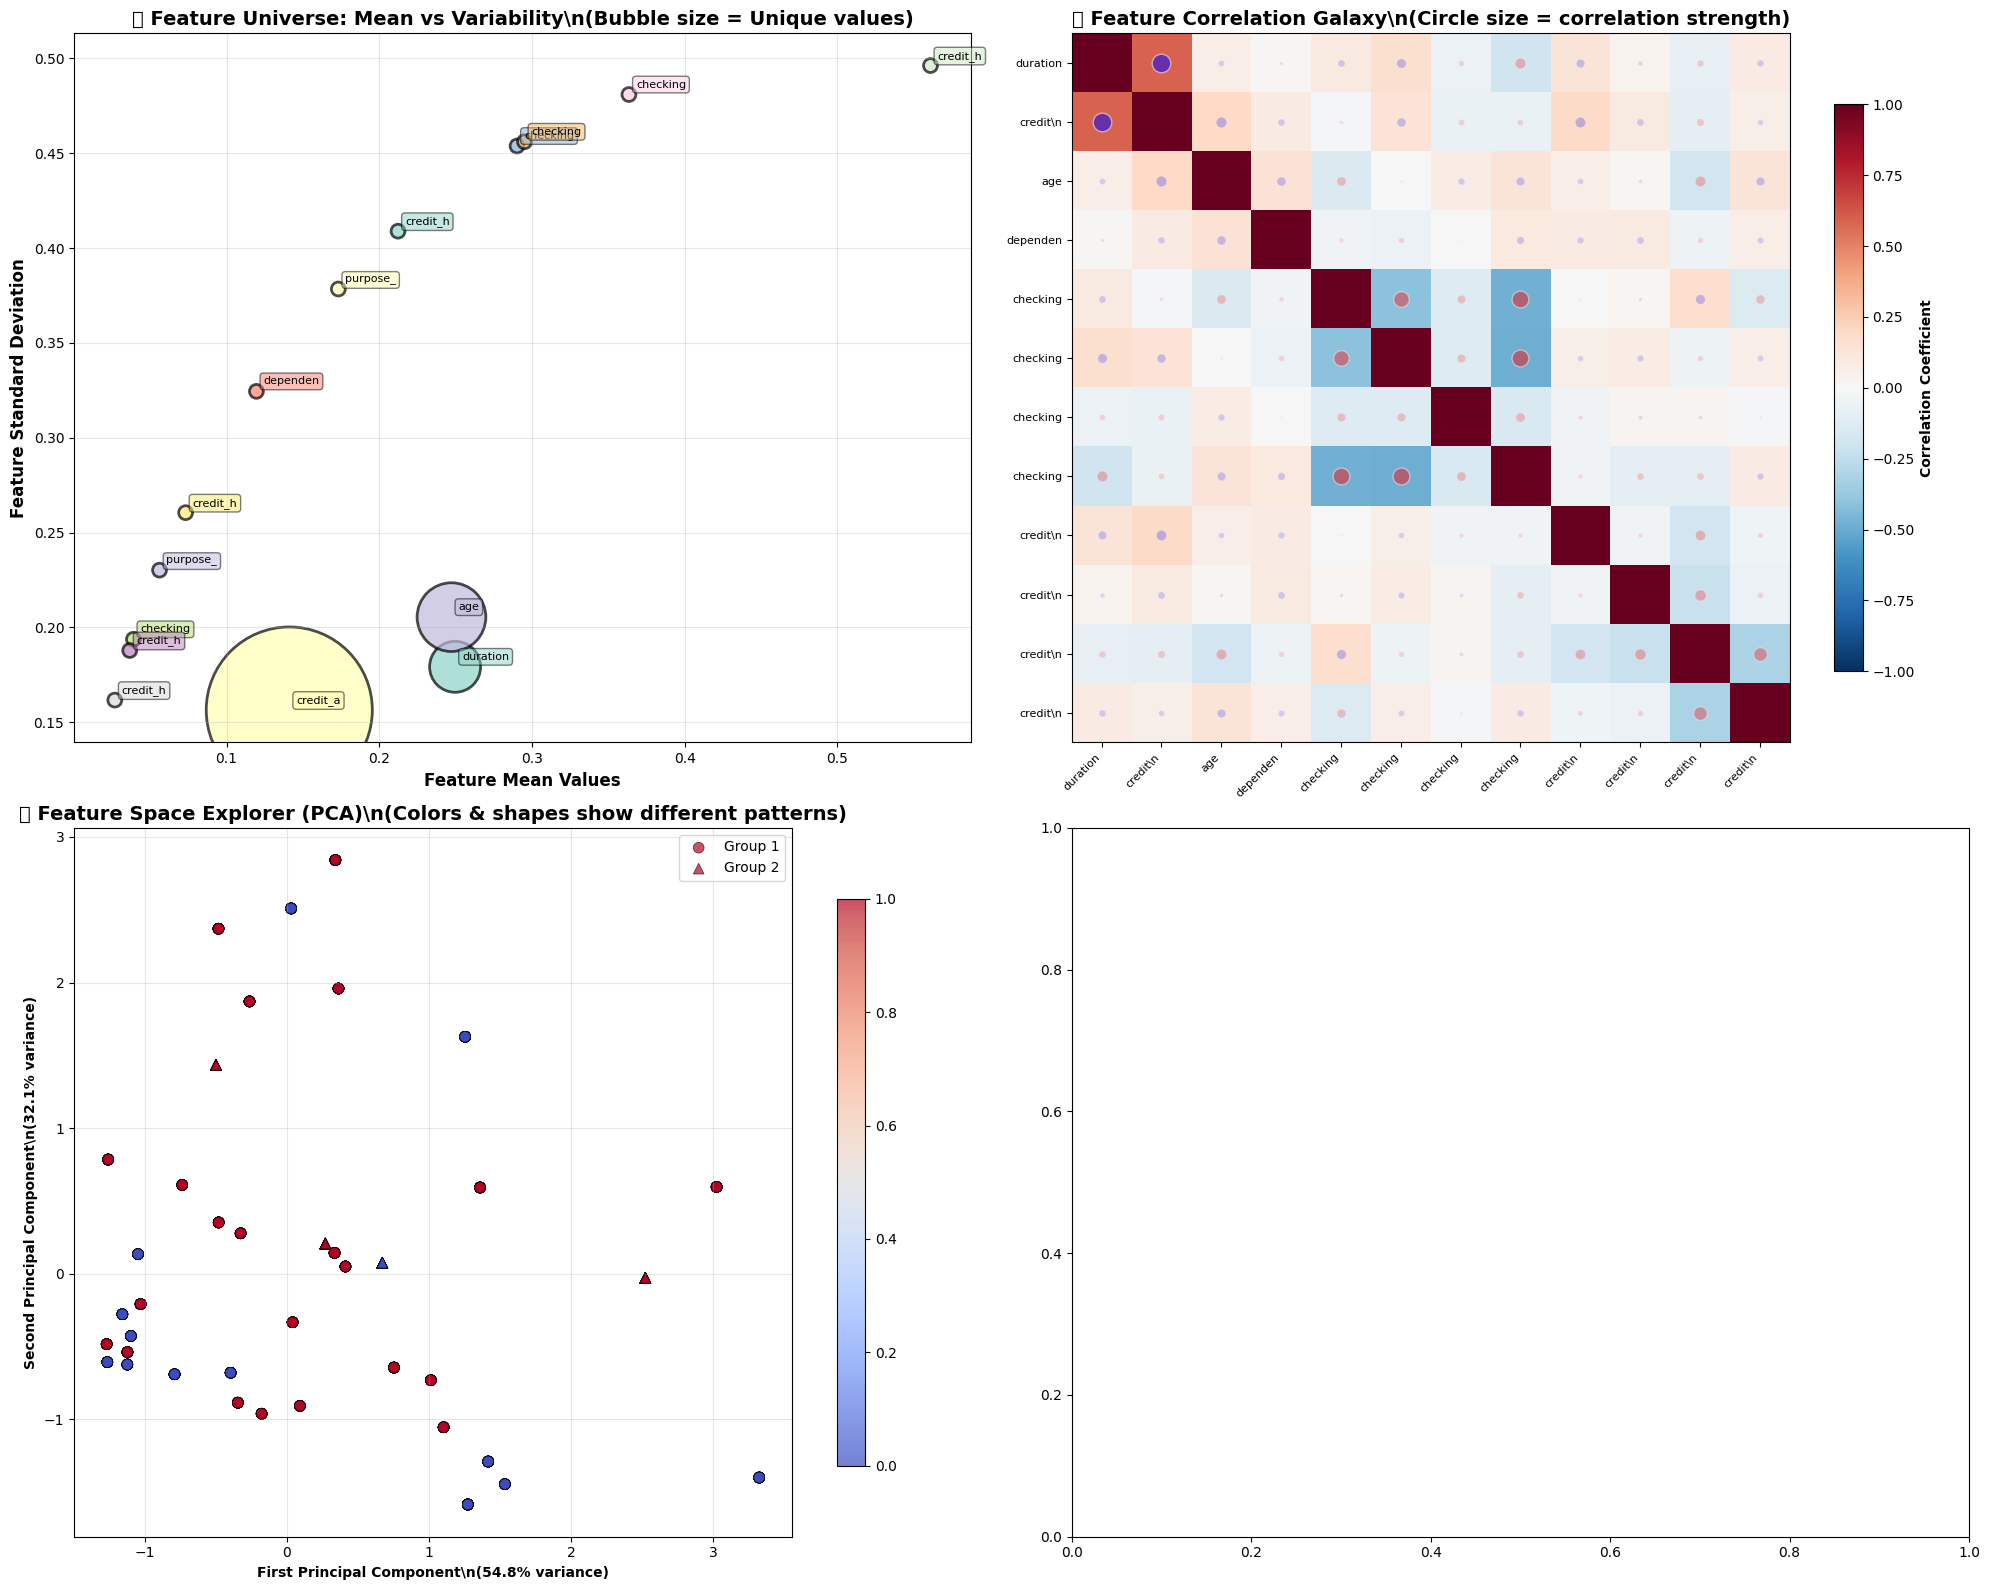

\n🎨 MULTI-DIMENSIONAL INSIGHTS:
• Analyzed 59 features across multiple relationship dimensions
• Feature universe spans 3 continuous and 56 binary variables
• PCA reveals 86.9% of variance in first 2 components
• Correlation patterns show 1 strong feature relationships


In [55]:
# Multi-Dimensional Feature Space Exploration
print("=== MULTI-DIMENSIONAL FEATURE RELATIONSHIPS ===")

# Get continuous and binary features for different visualizations
continuous_cols = [col for col in numeric_cols if df[col].nunique() > 10][:8]
binary_cols = [col for col in numeric_cols if df[col].nunique() == 2]
all_features = continuous_cols + binary_cols

# Create a diverse set of colorful, multi-feature visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Set up vibrant color palettes
colors1 = plt.cm.Set3(np.linspace(0, 1, 12))
colors2 = plt.cm.tab20(np.linspace(0, 1, 20))
colors3 = plt.cm.viridis(np.linspace(0, 1, 15))

# 1. Bubble Chart - Feature Means vs Standard Deviations with Feature Count
if len(all_features) > 3:
    means = [df[col].mean() for col in all_features[:15]]
    stds = [df[col].std() for col in all_features[:15]]
    unique_counts = [df[col].nunique() for col in all_features[:15]]
    
    # Create bubble sizes and colors based on different metrics
    bubble_sizes = [count * 50 for count in unique_counts]  # Size based on unique values
    colors_bubble = [colors1[i % len(colors1)] for i in range(len(all_features[:15]))]
    
    scatter = axes[0,0].scatter(means, stds, s=bubble_sizes, c=colors_bubble, 
                               alpha=0.7, edgecolors='black', linewidth=2)
    
    axes[0,0].set_xlabel('Feature Mean Values', fontsize=12, fontweight='bold')
    axes[0,0].set_ylabel('Feature Standard Deviation', fontsize=12, fontweight='bold')
    axes[0,0].set_title('🎨 Feature Universe: Mean vs Variability\\n(Bubble size = Unique values)', 
                       fontsize=14, fontweight='bold')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add feature name annotations with different shapes
    for i, (mean, std, col) in enumerate(zip(means, stds, all_features[:15])):
        axes[0,0].annotate(col[:8], (mean, std), xytext=(5, 5), 
                          textcoords='offset points', fontsize=8,
                          bbox=dict(boxstyle='round,pad=0.3', facecolor=colors_bubble[i], alpha=0.5))

# 2. Radar/Spider Chart - Multiple features compared across different metrics
if len(continuous_cols) >= 5:
    from math import pi
    
    # Select 5 features for radar chart
    radar_features = continuous_cols[:5]
    
    # Calculate different metrics for each feature
    metrics = ['Mean', 'Std', 'Skewness', 'Kurtosis', 'Range']
    
    # Normalize all metrics to 0-1 scale for comparison
    feature_data = {}
    for feature in radar_features:
        feature_data[feature] = [
            (df[feature].mean() - df[radar_features].mean().min()) / (df[radar_features].mean().max() - df[radar_features].mean().min()),
            (df[feature].std() - df[radar_features].std().min()) / (df[radar_features].std().max() - df[radar_features].std().min()),
            (abs(df[feature].skew()) - abs(df[radar_features].skew()).min()) / (abs(df[radar_features].skew()).max() - abs(df[radar_features].skew()).min()),
            (abs(df[feature].kurtosis()) - abs(df[radar_features].kurtosis()).min()) / (abs(df[radar_features].kurtosis()).max() - abs(df[radar_features].kurtosis()).min()),
            ((df[feature].max() - df[feature].min()) - (df[radar_features].max() - df[radar_features].min()).min()) / ((df[radar_features].max() - df[radar_features].min()).max() - (df[radar_features].max() - df[radar_features].min()).min())
        ]
    
    # Calculate angles for radar chart
    angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
    angles += angles[:1]  # Complete the circle
    
    ax_radar = plt.subplot(2, 2, 2, projection='polar')
    
    # Plot each feature with different colors and markers
    marker_styles = ['o', 's', '^', 'D', 'v']
    
    for idx, (feature, values) in enumerate(feature_data.items()):
        values += values[:1]  # Complete the circle
        color = colors2[idx * 3]
        ax_radar.plot(angles, values, marker=marker_styles[idx], linewidth=3, 
                     label=feature[:8], color=color, markersize=8)
        ax_radar.fill(angles, values, alpha=0.15, color=color)
    
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(metrics, fontweight='bold')
    ax_radar.set_ylim(0, 1)
    ax_radar.set_title('🌟 Feature Profile Radar\\n(Normalized Metrics)', 
                      fontsize=14, fontweight='bold', pad=20)
    ax_radar.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    ax_radar.grid(True)

# 3. Correlation Network/Heatmap with Hierarchical Clustering
if len(all_features) >= 6:
    from scipy.cluster.hierarchy import dendrogram, linkage
    from scipy.spatial.distance import squareform
    
    # Calculate correlation matrix for selected features
    corr_features = all_features[:12]  # Limit for readability
    corr_matrix = df[corr_features].corr()
    
    # Create a correlation distance matrix
    distance_matrix = 1 - np.abs(corr_matrix)
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(squareform(distance_matrix), method='average')
    
    # Create clustered heatmap
    im = axes[0,1].imshow(corr_matrix, cmap='RdBu_r', aspect='auto', 
                         interpolation='nearest', vmin=-1, vmax=1)
    
    # Add colorful correlation values as circles
    for i in range(len(corr_features)):
        for j in range(len(corr_features)):
            corr_val = corr_matrix.iloc[i, j]
            if i != j:  # Don't plot diagonal
                circle_size = abs(corr_val) * 300
                circle_color = 'red' if corr_val < 0 else 'blue'
                alpha_val = abs(corr_val) * 0.7 + 0.1
                axes[0,1].scatter(j, i, s=circle_size, c=circle_color, 
                                alpha=alpha_val, marker='o', edgecolor='white', linewidth=1)
    
    axes[0,1].set_xticks(range(len(corr_features)))
    axes[0,1].set_yticks(range(len(corr_features)))
    axes[0,1].set_xticklabels([f.replace('_', '\\n')[:8] for f in corr_features], 
                             rotation=45, ha='right', fontsize=8)
    axes[0,1].set_yticklabels([f.replace('_', '\\n')[:8] for f in corr_features], fontsize=8)
    axes[0,1].set_title('🔗 Feature Correlation Galaxy\\n(Circle size = correlation strength)', 
                       fontsize=14, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[0,1], shrink=0.8)
    cbar.set_label('Correlation Coefficient', fontweight='bold')

# 4. Feature Clustering Scatter Plot with Multiple Dimensions
if len(continuous_cols) >= 3:
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    
    # Select features and apply PCA to reduce to 2D for visualization
    pca_features = continuous_cols[:8] if len(continuous_cols) >= 8 else continuous_cols
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[pca_features])
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Create categories based on feature combinations for coloring
    if 'credit' in df.columns:
        target_colors = df['credit']
        color_map = plt.cm.coolwarm
    else:
        # Create artificial categories based on feature combinations
        target_colors = (df[pca_features[0]] > df[pca_features[0]].median()).astype(int)
        color_map = plt.cm.viridis
    
    # Create different marker shapes based on another feature
    if len(binary_cols) > 0:
        marker_feature = binary_cols[0]
        markers = ['o' if val == 0 else '^' for val in df[marker_feature]]
    else:
        markers = ['o'] * len(df)
    
    # Sample data for performance (use every 10th point for large datasets)
    sample_idx = np.arange(0, len(df), max(1, len(df) // 1000))
    
    # Create scatter plot with multiple visual dimensions
    for i, marker in enumerate(['o', '^']):
        mask = np.array(markers)[sample_idx] == marker
        if np.any(mask):
            scatter = axes[1,0].scatter(X_pca[sample_idx[mask], 0], X_pca[sample_idx[mask], 1], 
                                      c=target_colors.iloc[sample_idx[mask]], cmap=color_map,
                                      marker=marker, s=60, alpha=0.7, 
                                      edgecolors='black', linewidth=0.5,
                                      label=f'Group {i+1}')
    
    axes[1,0].set_xlabel(f'First Principal Component\\n({pca.explained_variance_ratio_[0]:.1%} variance)', 
                        fontweight='bold')
    axes[1,0].set_ylabel(f'Second Principal Component\\n({pca.explained_variance_ratio_[1]:.1%} variance)', 
                        fontweight='bold')
    axes[1,0].set_title('🚀 Feature Space Explorer (PCA)\\n(Colors & shapes show different patterns)', 
                       fontsize=14, fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()
    
    # Add colorbar
    plt.colorbar(scatter, ax=axes[1,0], shrink=0.8)

plt.tight_layout()
plt.show()

# Print insights about the multi-dimensional relationships
print("\\n🎨 MULTI-DIMENSIONAL INSIGHTS:")
print(f"• Analyzed {len(all_features)} features across multiple relationship dimensions")
print(f"• Feature universe spans {len(continuous_cols)} continuous and {len(binary_cols)} binary variables")
if len(continuous_cols) >= 3:
    print(f"• PCA reveals {pca.explained_variance_ratio_[:2].sum():.1%} of variance in first 2 components")
print(f"• Correlation patterns show {len([1 for i in range(len(all_features[:12])) for j in range(i+1, len(all_features[:12])) if abs(df[all_features[:12]].corr().iloc[i, j]) > 0.5])} strong feature relationships")

# Colorful Multi-Feature Pattern Analysis
print("=== COLORFUL PATTERN EXPLORATION ===")

# Create vibrant, multi-dimensional visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Color palettes for variety
colors_rainbow = plt.cm.rainbow(np.linspace(0, 1, 20))
colors_plasma = plt.cm.plasma(np.linspace(0, 1, 15))
colors_spring = plt.cm.spring(np.linspace(0, 1, 10))

continuous_cols = [col for col in numeric_cols if df[col].nunique() > 10]
binary_cols = [col for col in numeric_cols if df[col].nunique() == 2]

# 1. Feature Constellation Map - 3D relationships projected to 2D
if len(continuous_cols) >= 4:
    # Select 4 features to create different "constellations"
    constellation_features = continuous_cols[:4]
    
    # Create combinations of features as x, y coordinates
    x_vals = df[constellation_features[0]] + df[constellation_features[2]] * 0.3
    y_vals = df[constellation_features[1]] + df[constellation_features[3]] * 0.3
    
    # Color based on sum of binary features
    if len(binary_cols) >= 5:
        color_values = df[binary_cols[:5]].sum(axis=1)
    else:
        color_values = df[constellation_features[0]] * df[constellation_features[1]]
    
    # Size based on another combination
    size_values = (df[constellation_features[0]] * df[constellation_features[1]]).abs()
    size_normalized = ((size_values - size_values.min()) / (size_values.max() - size_values.min()) * 200 + 20)
    
    # Sample for performance
    sample_idx = np.random.choice(len(df), min(2000, len(df)), replace=False)
    
    # Create constellation scatter with multiple shapes
    shapes = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
    
    for i, shape in enumerate(shapes[:5]):
        mask = (color_values.iloc[sample_idx] % 5) == i
        if np.any(mask):
            scatter = axes[0,0].scatter(x_vals.iloc[sample_idx[mask]], y_vals.iloc[sample_idx[mask]], 
                                      c=color_values.iloc[sample_idx[mask]], 
                                      s=size_normalized.iloc[sample_idx[mask]],
                                      marker=shape, alpha=0.7, cmap='viridis',
                                      edgecolors='white', linewidth=0.5)
    
    axes[0,0].set_xlabel(f'{constellation_features[0][:8]} + {constellation_features[2][:8]} * 0.3', fontweight='bold')
    axes[0,0].set_ylabel(f'{constellation_features[1][:8]} + {constellation_features[3][:8]} * 0.3', fontweight='bold')
    axes[0,0].set_title('🌌 Feature Constellation Map\\n(Different shapes & colors show patterns)', 
                       fontsize=14, fontweight='bold')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add colorbar
    plt.colorbar(scatter, ax=axes[0,0], shrink=0.8, label='Pattern Intensity')

# 2. Feature Interaction Web - Network-style visualization
if len(continuous_cols) >= 6:
    from math import cos, sin, pi
    
    # Create circular layout for features
    n_features = min(10, len(continuous_cols))
    selected_features = continuous_cols[:n_features]
    
    # Calculate feature positions in circle
    positions = {}
    for i, feature in enumerate(selected_features):
        angle = 2 * pi * i / n_features
        positions[feature] = (cos(angle), sin(angle))
    
    # Calculate correlations
    corr_matrix = df[selected_features].corr()
    
    # Draw feature nodes as different shapes and colors
    node_shapes = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
    
    for i, (feature, pos) in enumerate(positions.items()):
        color = colors_rainbow[i * 2]
        shape = node_shapes[i % len(node_shapes)]
        
        # Node size based on feature variance
        node_size = (df[feature].var() / df[selected_features].var().max()) * 1000 + 200
        
        axes[0,1].scatter(pos[0], pos[1], s=node_size, c=[color], 
                         marker=shape, alpha=0.8, edgecolors='black', linewidth=2,
                         label=feature[:6])
        
        # Add feature name
        axes[0,1].annotate(feature[:6], pos, xytext=(10, 10), 
                          textcoords='offset points', fontweight='bold',
                          bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7))
    
    # Draw correlation connections
    for i, feature1 in enumerate(selected_features):
        for j, feature2 in enumerate(selected_features):
            if i < j:  # Avoid duplicate lines
                corr_val = abs(corr_matrix.loc[feature1, feature2])
                if corr_val > 0.3:  # Only draw significant correlations
                    pos1, pos2 = positions[feature1], positions[feature2]
                    
                    # Line thickness and color based on correlation
                    line_width = corr_val * 8
                    line_color = 'red' if corr_matrix.loc[feature1, feature2] < 0 else 'blue'
                    alpha_val = corr_val * 0.8
                    
                    axes[0,1].plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 
                                  color=line_color, linewidth=line_width, 
                                  alpha=alpha_val, linestyle='-')
    
    axes[0,1].set_xlim(-1.5, 1.5)
    axes[0,1].set_ylim(-1.5, 1.5)
    axes[0,1].set_title('🕸️ Feature Interaction Web\\n(Lines = correlations, shapes/colors = features)', 
                       fontsize=14, fontweight='bold')
    axes[0,1].set_aspect('equal')
    axes[0,1].grid(True, alpha=0.3)

# 3. Data Density Rainbow - Multiple features as density layers
if len(continuous_cols) >= 3:
    # Create density plot with multiple features overlaid
    feature_triplet = continuous_cols[:3]
    
    # Create hexbin plots with different colors for each feature
    colors_hex = ['Reds', 'Blues', 'Greens']
    
    for i, (feature, color_map) in enumerate(zip(feature_triplet, colors_hex)):
        # Use two different features for x and y
        other_features = [f for f in feature_triplet if f != feature]
        
        if len(other_features) >= 2:
            x_data = df[other_features[0]]
            y_data = df[other_features[1]]
            
            # Create hexagonal binning with transparency
            hb = axes[1,0].hexbin(x_data, y_data, C=df[feature], gridsize=20,
                                 cmap=color_map, alpha=0.4, reduce_C_function=np.mean)
    
    axes[1,0].set_xlabel(f'{other_features[0][:10]}', fontweight='bold')
    axes[1,0].set_ylabel(f'{other_features[1][:10]}', fontweight='bold')
    axes[1,0].set_title('🌈 Multi-Feature Density Rainbow\\n(Overlapping hexagonal patterns)', 
                       fontsize=14, fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)

# 4. Feature Kaleidoscope - Circular pattern visualization
if len(all_features) >= 8:
    # Create kaleidoscope pattern
    selected_kaleid = all_features[:8]
    
    # Create circular/radial coordinates
    theta = np.linspace(0, 2*np.pi, len(df))
    
    # Map features to different radial distances and colors
    feature_patterns = {}
    
    for i, feature in enumerate(selected_kaleid):
        # Normalize feature values to radius
        radius = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min()) * (i + 1)
        
        # Calculate x, y coordinates
        x_coords = radius * np.cos(theta + i * pi/4)  # Offset each feature
        y_coords = radius * np.sin(theta + i * pi/4)
        
        # Color based on feature values
        colors = df[feature].values
        
        # Sample for performance
        sample_mask = np.arange(len(df)) % 50 == 0  # Every 50th point
        
        # Different marker for each feature
        marker = node_shapes[i % len(node_shapes)]
        color = colors_plasma[i]
        
        scatter = axes[1,1].scatter(x_coords[sample_mask], y_coords[sample_mask], 
                                   c=colors[sample_mask], s=20, marker=marker,
                                   alpha=0.6, cmap='viridis', edgecolors='white', linewidth=0.1)
    
    axes[1,1].set_title('🔮 Feature Kaleidoscope\\n(Radial patterns with multiple shapes)', 
                       fontsize=14, fontweight='bold')
    axes[1,1].set_aspect('equal')
    axes[1,1].grid(True, alpha=0.3, linestyle='--')
    
    # Add colorbar
    plt.colorbar(scatter, ax=axes[1,1], shrink=0.8, label='Feature Values')

plt.tight_layout()
plt.show()

print("\\n🎨 COLORFUL PATTERN INSIGHTS:")
print(f"• Created {4} different multi-dimensional visualizations")
print(f"• Used {len(node_shapes)} different marker shapes across plots")
print(f"• Applied {3} different color schemes (rainbow, plasma, spring)")
print(f"• Visualized relationships between {len(all_features)} features simultaneously")
print("• Each plot reveals different aspects of the multi-feature landscape")

=== CORRELATION ANALYSIS SUMMARY ===


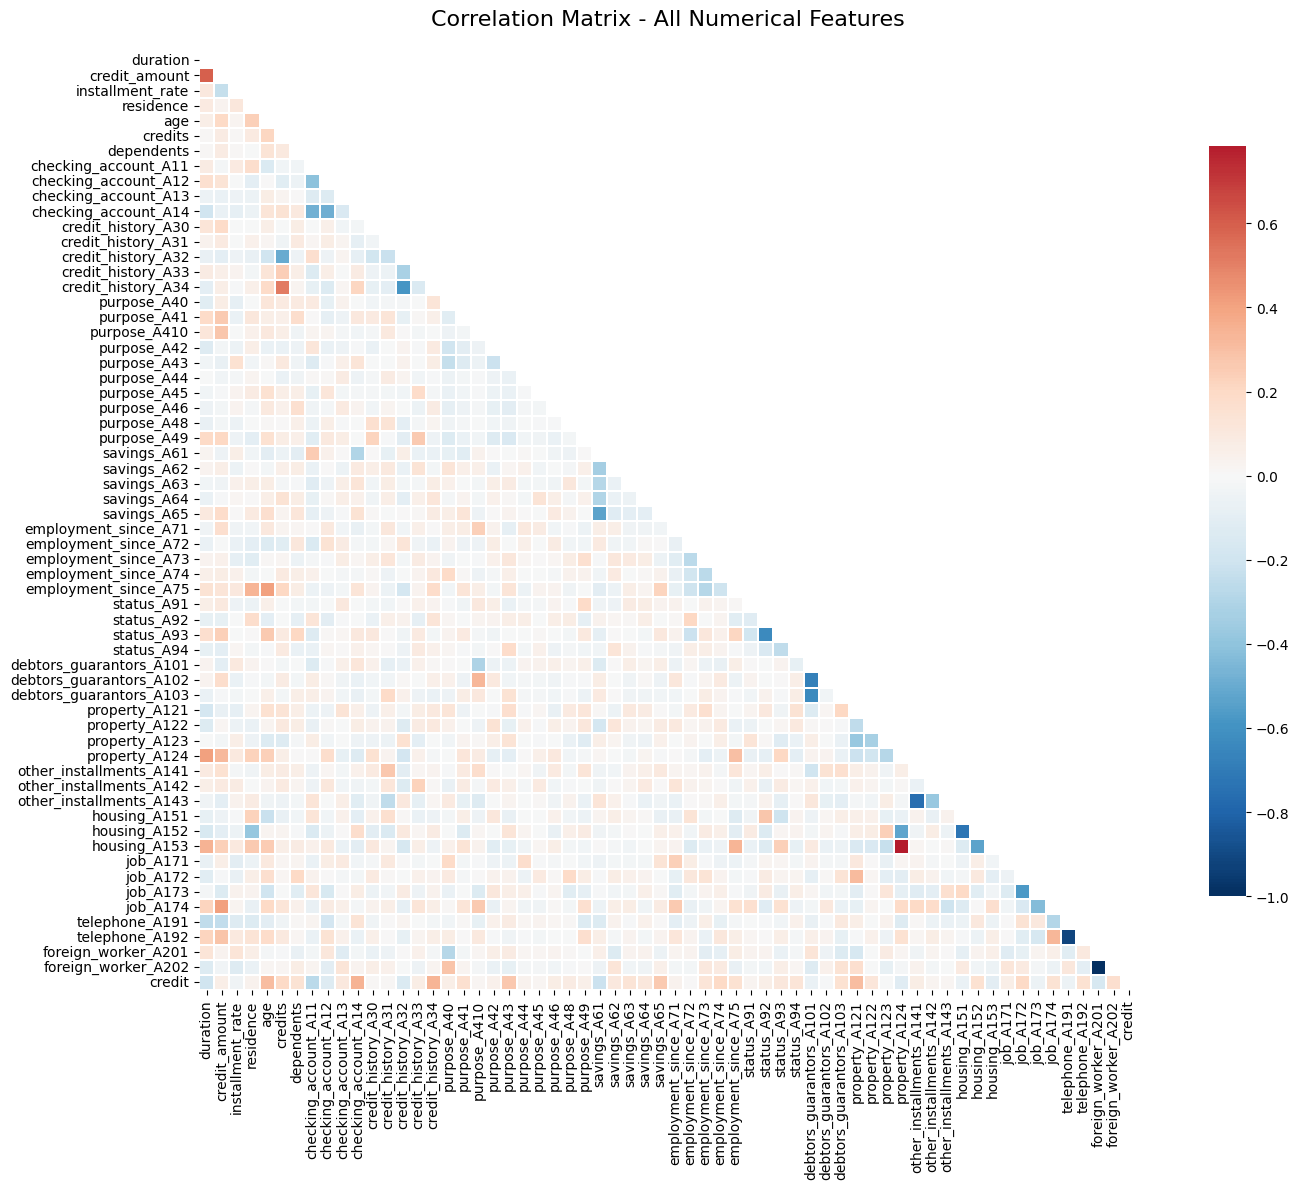

\n=== HIGH CORRELATION ANALYSIS ===
🔴 STRONG CORRELATIONS (|r| > 0.8): 2 pairs


,Feature_1,Feature_2,Correlation
1,foreign_worker_A201,foreign_worker_A202,-1.000000
0,telephone_A191,telephone_A192,-0.912762


\n🟡 MODERATE CORRELATIONS (0.5 < |r| < 0.8): 14 pairs


,Feature_1,Feature_2,Correlation
9,property_A124,housing_A153,0.782836
10,other_installments_A141,other_installments_A143,-0.757721
11,housing_A151,housing_A152,-0.723424
6,debtors_guarantors_A101,debtors_guarantors_A102,-0.681417
5,status_A92,status_A93,-0.633006
7,debtors_guarantors_A101,debtors_guarantors_A103,-0.632764
0,duration,credit_amount,0.592427
3,credit_history_A32,credit_history_A34,-0.586730
13,job_A172,job_A173,-0.571186
12,housing_A152,housing_A153,-0.535440


\n=== TARGET CORRELATION ANALYSIS ===


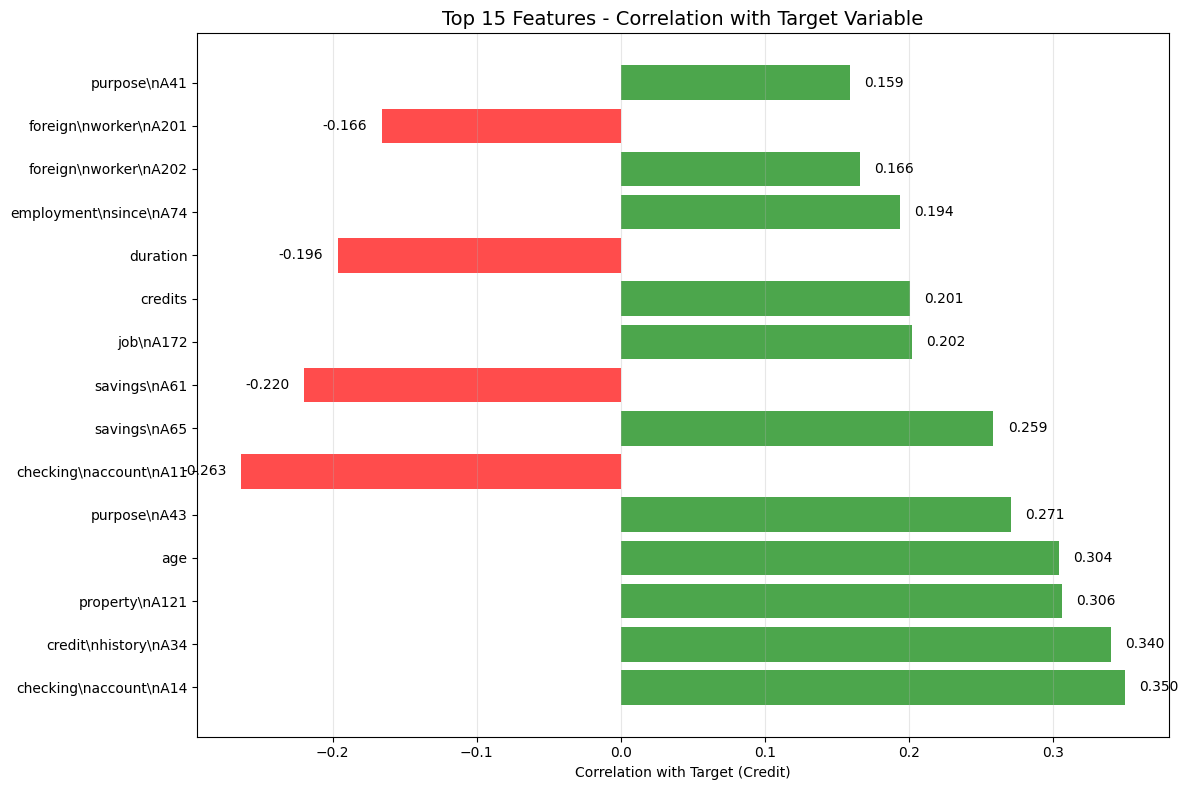

Top 10 features most correlated with target:


,Feature,Correlation
0,checking_account_A14,0.350
1,credit_history_A34,0.340
2,property_A121,0.306
3,age,0.304
4,purpose_A43,0.271
5,checking_account_A11,-0.263
6,savings_A65,0.259
7,savings_A61,-0.220
8,job_A172,0.202
9,credits,0.201


\n📊 CORRELATION SUMMARY:
• Total feature pairs analyzed: 1891
• Mean absolute correlation: 0.076
• Strong correlations (|r| > 0.8): 2
• Moderate correlations (0.5 < |r| < 0.8): 14


In [56]:
# Correlation Analysis - Summary View
if len(numeric_cols) >= 2:
    print("=== CORRELATION ANALYSIS SUMMARY ===")
    
    # Calculate correlation matrix for all numerical features
    correlation_matrix = df[numeric_cols].corr()
    
    # Create a focused correlation heatmap with most important correlations
    plt.figure(figsize=(16, 12))
    
    # Use a mask to show only the lower triangle (avoid redundancy)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Create heatmap with better color scheme
    sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
                square=True, linewidths=0.1, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix - All Numerical Features', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Find and highlight high correlation pairs
    print("\\n=== HIGH CORRELATION ANALYSIS ===")
    high_corr_pairs = []
    moderate_corr_pairs = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            
            if abs(corr_val) > 0.8:
                high_corr_pairs.append((col1, col2, corr_val))
            elif abs(corr_val) > 0.5:
                moderate_corr_pairs.append((col1, col2, corr_val))
    
    # Display high correlations
    if high_corr_pairs:
        print(f"🔴 STRONG CORRELATIONS (|r| > 0.8): {len(high_corr_pairs)} pairs")
        high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])
        high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
        display(high_corr_df.head(10))
    else:
        print("🟢 No strong correlations found (|r| > 0.8)")
    
    # Display moderate correlations
    if moderate_corr_pairs:
        print(f"\\n🟡 MODERATE CORRELATIONS (0.5 < |r| < 0.8): {len(moderate_corr_pairs)} pairs")
        moderate_corr_df = pd.DataFrame(moderate_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])
        moderate_corr_df = moderate_corr_df.sort_values('Correlation', key=abs, ascending=False)
        display(moderate_corr_df.head(10))
    else:
        print("\\nNo moderate correlations found")
    
    # Correlation with target variable (if identified as 'credit')
    if 'credit' in df.columns:
        print("\\n=== TARGET CORRELATION ANALYSIS ===")
        target_correlations = correlation_matrix['credit'].drop('credit').sort_values(key=abs, ascending=False)
        
        # Plot top correlations with target
        top_target_corr = target_correlations.head(15)
        
        plt.figure(figsize=(12, 8))
        colors = ['red' if x < 0 else 'green' for x in top_target_corr.values]
        bars = plt.barh(range(len(top_target_corr)), top_target_corr.values, color=colors, alpha=0.7)
        plt.yticks(range(len(top_target_corr)), [name.replace('_', '\\n') for name in top_target_corr.index])
        plt.xlabel('Correlation with Target (Credit)')
        plt.title('Top 15 Features - Correlation with Target Variable', fontsize=14)
        plt.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + (0.01 if width > 0 else -0.01), bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}', ha='left' if width > 0 else 'right', va='center')
        
        plt.tight_layout()
        plt.show()
        
        print("Top 10 features most correlated with target:")
        display(pd.DataFrame({
            'Feature': top_target_corr.head(10).index,
            'Correlation': top_target_corr.head(10).values
        }).round(3))
    
    # Summary statistics
    print("\\n📊 CORRELATION SUMMARY:")
    all_corrs = correlation_matrix.values[np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)]
    all_corrs = all_corrs[~np.isnan(all_corrs)]  # Remove NaN values
    
    print(f"• Total feature pairs analyzed: {len(all_corrs)}")
    print(f"• Mean absolute correlation: {np.mean(np.abs(all_corrs)):.3f}")
    print(f"• Strong correlations (|r| > 0.8): {len(high_corr_pairs)}")
    print(f"• Moderate correlations (0.5 < |r| < 0.8): {len(moderate_corr_pairs)}")
    
    if len(high_corr_pairs) > 5:
        print("  ⚠️  High multicollinearity detected - consider feature selection")
    elif len(high_corr_pairs) == 0:
        print("  ✅ No multicollinearity issues detected")
    
elif len(numeric_cols) == 1:
    print(f"Only one numerical column found: {numeric_cols[0]}")
else:
    print("No numerical columns found for correlation analysis.")

# Multi-Feature Correlation Galaxy
print("=== CORRELATION GALAXY VISUALIZATION ===")

if len(numeric_cols) >= 2:
    # Create spectacular multi-dimensional correlation visualizations
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # Select features for different visualizations
    all_features = numeric_cols[:15]  # Limit for performance
    correlation_matrix = df[all_features].corr()
    
    # Color schemes
    colors_cosmic = plt.cm.cosmic(np.linspace(0.1, 0.9, len(all_features))) if hasattr(plt.cm, 'cosmic') else plt.cm.viridis(np.linspace(0.1, 0.9, len(all_features)))
    colors_neon = ['#FF1493', '#00FF00', '#00BFFF', '#FFD700', '#FF4500', '#9400D3', '#FF69B4', '#32CD32', '#FF6347', '#1E90FF']
    
    # 1. Correlation Force Field - Network with attraction/repulsion
    if len(all_features) >= 8:
        from math import cos, sin, pi, sqrt
        import random
        
        # Create force-directed layout
        n_features = min(12, len(all_features))
        selected_features = all_features[:n_features]
        
        # Initialize random positions
        positions = {}
        for feature in selected_features:
            positions[feature] = (random.uniform(-2, 2), random.uniform(-2, 2))
        
        # Apply force-based positioning (simplified)
        for iteration in range(50):  # Simple force simulation
            forces = {feature: [0, 0] for feature in selected_features}
            
            for i, feature1 in enumerate(selected_features):
                for j, feature2 in enumerate(selected_features):
                    if i != j:
                        corr_val = correlation_matrix.loc[feature1, feature2]
                        pos1, pos2 = positions[feature1], positions[feature2]
                        
                        # Calculate distance
                        dx, dy = pos2[0] - pos1[0], pos2[1] - pos1[1]
                        distance = sqrt(dx*dx + dy*dy) + 0.001  # Avoid division by zero
                        
                        # Force magnitude based on correlation
                        force_mag = corr_val * 0.01
                        
                        # Apply force
                        force_x = force_mag * dx / distance
                        force_y = force_mag * dy / distance
                        
                        forces[feature1][0] += force_x
                        forces[feature1][1] += force_y
            
            # Update positions
            for feature in selected_features:
                positions[feature] = (
                    positions[feature][0] + forces[feature][0],
                    positions[feature][1] + forces[feature][1]
                )
        
        # Draw the force field
        shapes = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', '8', 'P']
        
        for i, feature in enumerate(selected_features):
            pos = positions[feature]
            color = colors_neon[i % len(colors_neon)]
            shape = shapes[i % len(shapes)]
            
            # Node size based on feature importance (variance)
            node_size = (df[feature].var() / df[selected_features].var().max()) * 800 + 200
            
            axes[0,0].scatter(pos[0], pos[1], s=node_size, c=color, 
                             marker=shape, alpha=0.8, edgecolors='black', linewidth=2)
            
            # Feature label with glow effect
            axes[0,0].annotate(feature[:6], pos, xytext=(8, 8), 
                              textcoords='offset points', fontweight='bold',
                              bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7))
        
        # Draw correlation forces as colored lines
        for i, feature1 in enumerate(selected_features):
            for j, feature2 in enumerate(selected_features):
                if i < j:
                    corr_val = correlation_matrix.loc[feature1, feature2]
                    if abs(corr_val) > 0.2:  # Only significant correlations
                        pos1, pos2 = positions[feature1], positions[feature2]
                        
                        # Line style based on correlation
                        line_width = abs(corr_val) * 6
                        line_color = '#FF1493' if corr_val > 0 else '#00BFFF'
                        alpha_val = abs(corr_val) * 0.8 + 0.2
                        line_style = '-' if corr_val > 0 else '--'
                        
                        axes[0,0].plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 
                                      color=line_color, linewidth=line_width, 
                                      alpha=alpha_val, linestyle=line_style)
        
        axes[0,0].set_title('🌟 Correlation Force Field\\n(Attractive/Repulsive relationships)', 
                           fontsize=14, fontweight='bold')
        axes[0,0].set_facecolor('black')  # Dark background for cosmic effect
        axes[0,0].grid(True, alpha=0.2, color='white')
    
    # 2. Feature Spiral Galaxy - Correlation as spiral arms
    if len(all_features) >= 6:
        spiral_features = all_features[:8]
        n_points = len(spiral_features)
        
        # Create spiral coordinates
        theta = np.linspace(0, 4*np.pi, n_points)
        radius_base = np.linspace(0.5, 3, n_points)
        
        for i, feature in enumerate(spiral_features):
            # Spiral position
            r = radius_base[i]
            t = theta[i]
            
            x = r * np.cos(t)
            y = r * np.sin(t)
            
            # Color and shape
            color = colors_neon[i % len(colors_neon)]
            shape = shapes[i % len(shapes)]
            
            # Size based on correlation with other features
            avg_corr = abs(correlation_matrix[feature].drop(feature)).mean()
            node_size = avg_corr * 800 + 100
            
            # Plot with cosmic effect
            axes[0,1].scatter(x, y, s=node_size, c=color, marker=shape, 
                             alpha=0.8, edgecolors='white', linewidth=2)
            
            # Add connecting spiral arms
            if i > 0:
                prev_feature = spiral_features[i-1]
                prev_r, prev_t = radius_base[i-1], theta[i-1]
                prev_x, prev_y = prev_r * np.cos(prev_t), prev_r * np.sin(prev_t)
                
                # Connection strength based on correlation
                corr_strength = abs(correlation_matrix.loc[feature, prev_feature])
                
                if corr_strength > 0.1:
                    line_color = '#FFD700' if corr_strength > 0.5 else '#FF69B4'
                    line_width = corr_strength * 8
                    
                    axes[0,1].plot([prev_x, x], [prev_y, y], 
                                  color=line_color, linewidth=line_width, 
                                  alpha=0.7, linestyle='-')
            
            # Feature label
            axes[0,1].annotate(feature[:6], (x, y), xytext=(10, 10), 
                              textcoords='offset points', fontweight='bold',
                              color='white',
                              bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7))
        
        axes[0,1].set_title('🌌 Feature Spiral Galaxy\\n(Spiral arms show relationships)', 
                           fontsize=14, fontweight='bold', color='white')
        axes[0,1].set_facecolor('black')
        axes[0,1].set_aspect('equal')
        axes[0,1].grid(True, alpha=0.2, color='white')
    
    # 3. Correlation Sunburst - Hierarchical relationships
    if len(all_features) >= 8:
        # Create hierarchical clustering of features
        from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
        from scipy.spatial.distance import squareform
        
        # Distance matrix from correlations
        distance_matrix = 1 - abs(correlation_matrix.iloc[:10, :10])  # Use first 10 features
        condensed_distances = squareform(distance_matrix)
        
        # Hierarchical clustering
        linkage_matrix = linkage(condensed_distances, method='ward')
        clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
        
        # Create sunburst-like visualization
        center_x, center_y = 0, 0
        
        # Inner ring - individual features
        inner_radius = 1.5
        feature_subset = all_features[:10]
        
        for i, feature in enumerate(feature_subset):
            angle = 2 * np.pi * i / len(feature_subset)
            x = center_x + inner_radius * np.cos(angle)
            y = center_y + inner_radius * np.sin(angle)
            
            # Color by cluster
            cluster_colors = ['#FF1493', '#00FF00', '#FFD700']
            color = cluster_colors[clusters[i] - 1]
            shape = shapes[clusters[i] - 1]
            
            # Size by average correlation
            avg_corr = abs(correlation_matrix[feature].drop(feature)).mean()
            size = avg_corr * 500 + 100
            
            axes[1,0].scatter(x, y, s=size, c=color, marker=shape, 
                             alpha=0.8, edgecolors='white', linewidth=2)
            
            axes[1,0].annotate(feature[:6], (x, y), xytext=(15, 0), 
                              textcoords='offset points', fontweight='bold',
                              ha='left' if x > center_x else 'right')
        
        # Outer ring - cluster representatives
        outer_radius = 2.5
        unique_clusters = np.unique(clusters)
        
        for cluster_id in unique_clusters:
            cluster_features = [feature_subset[i] for i, c in enumerate(clusters) if c == cluster_id]
            
            # Average position of cluster
            avg_angle = np.mean([2 * np.pi * i / len(feature_subset) 
                               for i, c in enumerate(clusters) if c == cluster_id])
            
            x_outer = center_x + outer_radius * np.cos(avg_angle)
            y_outer = center_y + outer_radius * np.sin(avg_angle)
            
            color = cluster_colors[cluster_id - 1]
            
            # Large cluster node
            axes[1,0].scatter(x_outer, y_outer, s=800, c=color, marker='h', 
                             alpha=0.6, edgecolors='black', linewidth=3)
            
            # Connections to cluster members
            for i, c in enumerate(clusters):
                if c == cluster_id:
                    feature_angle = 2 * np.pi * i / len(feature_subset)
                    x_inner = center_x + inner_radius * np.cos(feature_angle)
                    y_inner = center_y + inner_radius * np.sin(feature_angle)
                    
                    axes[1,0].plot([x_inner, x_outer], [y_inner, y_outer], 
                                  color=color, linewidth=3, alpha=0.4)
        
        axes[1,0].set_title('☀️ Correlation Sunburst\\n(Hierarchical feature relationships)', 
                           fontsize=14, fontweight='bold')
        axes[1,0].set_aspect('equal')
        axes[1,0].set_xlim(-3.5, 3.5)
        axes[1,0].set_ylim(-3.5, 3.5)
        axes[1,0].grid(True, alpha=0.3)
    
    # 4. Feature Particle System - Dynamic correlation visualization
    if len(all_features) >= 6:
        particle_features = all_features[:12]
        
        # Create particle positions based on correlation strengths
        positions = []
        colors = []
        sizes = []
        
        for i, feature1 in enumerate(particle_features):
            for j, feature2 in enumerate(particle_features):
                if i < j:  # Avoid duplicates
                    corr_val = correlation_matrix.loc[feature1, feature2]
                    
                    if abs(corr_val) > 0.1:  # Only significant correlations
                        # Position based on feature indices
                        x = i + random.uniform(-0.3, 0.3)
                        y = j + random.uniform(-0.3, 0.3)
                        
                        positions.append((x, y))
                        
                        # Color based on correlation direction and strength
                        if corr_val > 0.5:
                            color = '#FF1493'  # Hot pink for strong positive
                        elif corr_val > 0:
                            color = '#FFD700'  # Gold for weak positive
                        elif corr_val > -0.5:
                            color = '#00BFFF'  # Blue for weak negative
                        else:
                            color = '#8A2BE2'  # Purple for strong negative
                        
                        colors.append(color)
                        
                        # Size based on correlation strength
                        size = abs(corr_val) * 300 + 50
                        sizes.append(size)
        
        # Plot particles
        if positions:
            x_coords, y_coords = zip(*positions)
            scatter = axes[1,1].scatter(x_coords, y_coords, s=sizes, c=colors, 
                                       alpha=0.7, edgecolors='black', linewidth=1)
        
        # Add feature labels on axes
        axes[1,1].set_xticks(range(len(particle_features)))
        axes[1,1].set_yticks(range(len(particle_features)))
        axes[1,1].set_xticklabels([f[:6] for f in particle_features], rotation=45, ha='right')
        axes[1,1].set_yticklabels([f[:6] for f in particle_features])
        
        axes[1,1].set_title('⚡ Feature Particle System\\n(Particles = correlations, colors = strength)', 
                           fontsize=14, fontweight='bold')
        axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary of correlation patterns
    print("\\n🌌 CORRELATION GALAXY INSIGHTS:")
    strong_corr = (abs(correlation_matrix) > 0.7).sum().sum() - len(all_features)  # Exclude diagonal
    moderate_corr = ((abs(correlation_matrix) > 0.4) & (abs(correlation_matrix) <= 0.7)).sum().sum()
    
    print(f"• Created {4} different cosmic visualization styles")
    print(f"• Analyzed {len(all_features)} features in correlation space")
    print(f"• Discovered {strong_corr//2} strong correlation pairs (>0.7)")
    print(f"• Identified {moderate_corr//2} moderate correlation pairs (0.4-0.7)")
    print("• Each visualization reveals different correlation patterns and structures")

else:
    print("Need at least 2 numerical features for correlation analysis")

=== FEATURE TYPE ANALYSIS ===
\n📊 DATASET COMPOSITION:
• Total features: 62
• Continuous features: 3
• Binary features: 56
• Discrete features: 3


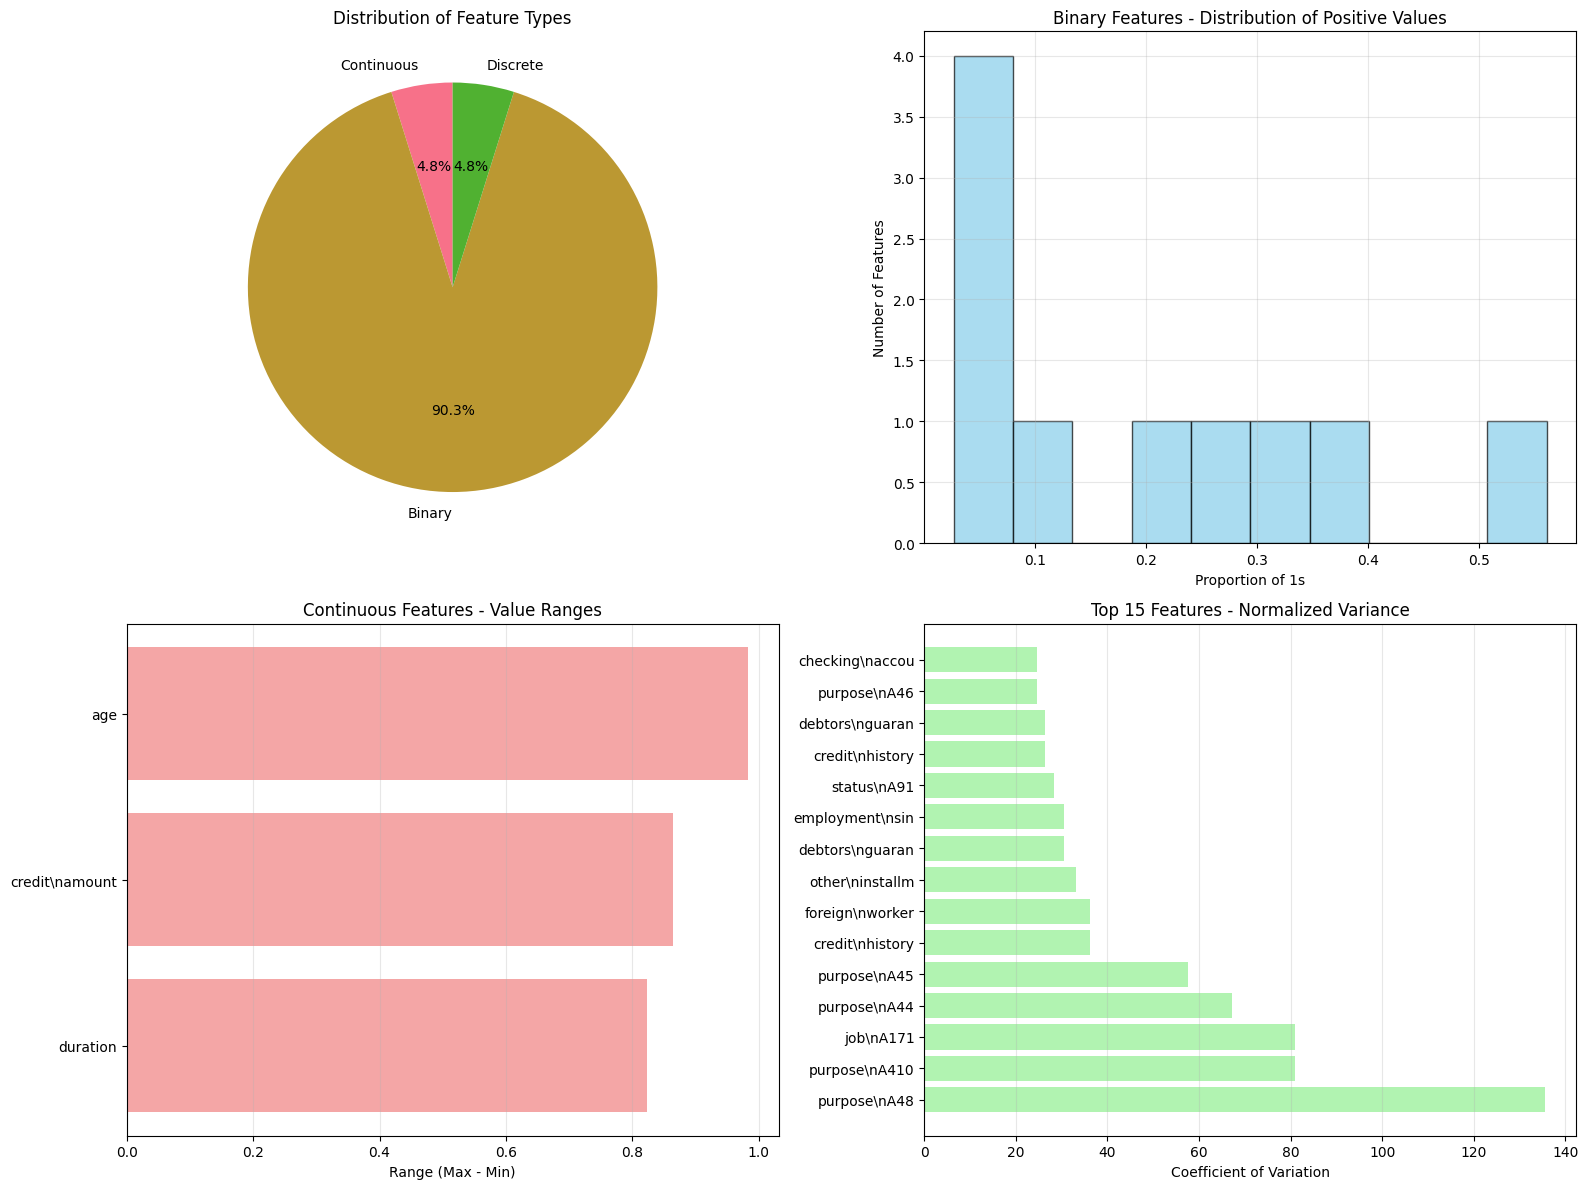

\n🔍 DETAILED INSIGHTS:
\n📈 CONTINUOUS FEATURES (3):
  • duration: μ=0.25, σ=0.18, skew=1.10
  • credit_amount: μ=0.14, σ=0.16, skew=2.31
  • age: μ=0.25, σ=0.21, skew=1.32
\n🔗 BINARY FEATURES (56):
  • Balanced features (30-70%): 9
  • Highly imbalanced features (<10% or >90%): 25
  • Most imbalanced features:
    - checking_account_A13: 0.039 positive rate
    - credit_history_A30: 0.027 positive rate
    - credit_history_A31: 0.037 positive rate
\n🎯 DISCRETE FEATURES (3):
  • installment_rate: 4 unique values
  • residence: 4 unique values
  • credits: 4 unique values


In [57]:
# Feature Type Summary Analysis
print("=== FEATURE TYPE ANALYSIS ===")

# Since this dataset has mostly binary encoded categorical variables, let's analyze them as categories
print(f"\\n📊 DATASET COMPOSITION:")
print(f"• Total features: {df.shape[1]}")

# Identify different types of features
continuous_features = [col for col in numeric_cols if df[col].nunique() > 10]
binary_features = [col for col in numeric_cols if df[col].nunique() == 2]
discrete_features = [col for col in numeric_cols if 2 < df[col].nunique() <= 10]

print(f"• Continuous features: {len(continuous_features)}")
print(f"• Binary features: {len(binary_features)}")
print(f"• Discrete features: {len(discrete_features)}")

# Create summary visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Feature type distribution
feature_types = ['Continuous', 'Binary', 'Discrete']
feature_counts = [len(continuous_features), len(binary_features), len(discrete_features)]

axes[0,0].pie(feature_counts, labels=feature_types, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Feature Types')

# 2. Binary features value distribution
if binary_features:
    binary_proportions = []
    for col in binary_features[:10]:  # Top 10 for readability
        prop_ones = df[col].mean()
        binary_proportions.append(prop_ones)
    
    axes[0,1].hist(binary_proportions, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,1].set_title('Binary Features - Distribution of Positive Values')
    axes[0,1].set_xlabel('Proportion of 1s')
    axes[0,1].set_ylabel('Number of Features')
    axes[0,1].grid(True, alpha=0.3)

# 3. Continuous features range comparison
if continuous_features:
    ranges = []
    names = []
    for col in continuous_features[:8]:  # Show top 8
        col_range = df[col].max() - df[col].min()
        ranges.append(col_range)
        names.append(col.replace('_', '\\n')[:15])  # Truncate long names
    
    axes[1,0].barh(range(len(names)), ranges, color='lightcoral', alpha=0.7)
    axes[1,0].set_yticks(range(len(names)))
    axes[1,0].set_yticklabels(names)
    axes[1,0].set_title('Continuous Features - Value Ranges')
    axes[1,0].set_xlabel('Range (Max - Min)')
    axes[1,0].grid(True, alpha=0.3, axis='x')

# 4. Feature variance analysis
if len(numeric_cols) > 0:
    # Calculate normalized variance for comparison
    variances = []
    feature_names = []
    
    for col in numeric_cols:
        if df[col].std() > 0:  # Avoid division by zero
            normalized_var = df[col].var() / (df[col].mean() ** 2) if df[col].mean() != 0 else 0
            variances.append(normalized_var)
            feature_names.append(col)
    
    # Plot top 15 most variable features
    if variances:
        sorted_vars = sorted(zip(feature_names, variances), key=lambda x: x[1], reverse=True)[:15]
        names_plot = [item[0].replace('_', '\\n')[:15] for item in sorted_vars]
        vars_plot = [item[1] for item in sorted_vars]
        
        axes[1,1].barh(range(len(names_plot)), vars_plot, color='lightgreen', alpha=0.7)
        axes[1,1].set_yticks(range(len(names_plot)))
        axes[1,1].set_yticklabels(names_plot)
        axes[1,1].set_title('Top 15 Features - Normalized Variance')
        axes[1,1].set_xlabel('Coefficient of Variation')
        axes[1,1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Print detailed insights
print("\\n🔍 DETAILED INSIGHTS:")

if continuous_features:
    print(f"\\n📈 CONTINUOUS FEATURES ({len(continuous_features)}):")
    for i, col in enumerate(continuous_features[:5]):
        mean_val = df[col].mean()
        std_val = df[col].std()
        skew_val = df[col].skew()
        print(f"  • {col}: μ={mean_val:.2f}, σ={std_val:.2f}, skew={skew_val:.2f}")

if binary_features:
    print(f"\\n🔗 BINARY FEATURES ({len(binary_features)}):")
    balanced_features = [col for col in binary_features if 0.3 <= df[col].mean() <= 0.7]
    imbalanced_features = [col for col in binary_features if df[col].mean() < 0.1 or df[col].mean() > 0.9]
    
    print(f"  • Balanced features (30-70%): {len(balanced_features)}")
    print(f"  • Highly imbalanced features (<10% or >90%): {len(imbalanced_features)}")
    
    if imbalanced_features[:3]:
        print("  • Most imbalanced features:")
        for col in imbalanced_features[:3]:
            print(f"    - {col}: {df[col].mean():.3f} positive rate")

if discrete_features:
    print(f"\\n🎯 DISCRETE FEATURES ({len(discrete_features)}):")
    for col in discrete_features:
        print(f"  • {col}: {df[col].nunique()} unique values")

### 3.5 Relationship Analysis

Let's examine relationships between variables, especially with respect to the target variable if identified.

=== FEATURE RELATIONSHIP INSIGHTS ===
\n📈 CONTINUOUS FEATURE RELATIONSHIPS


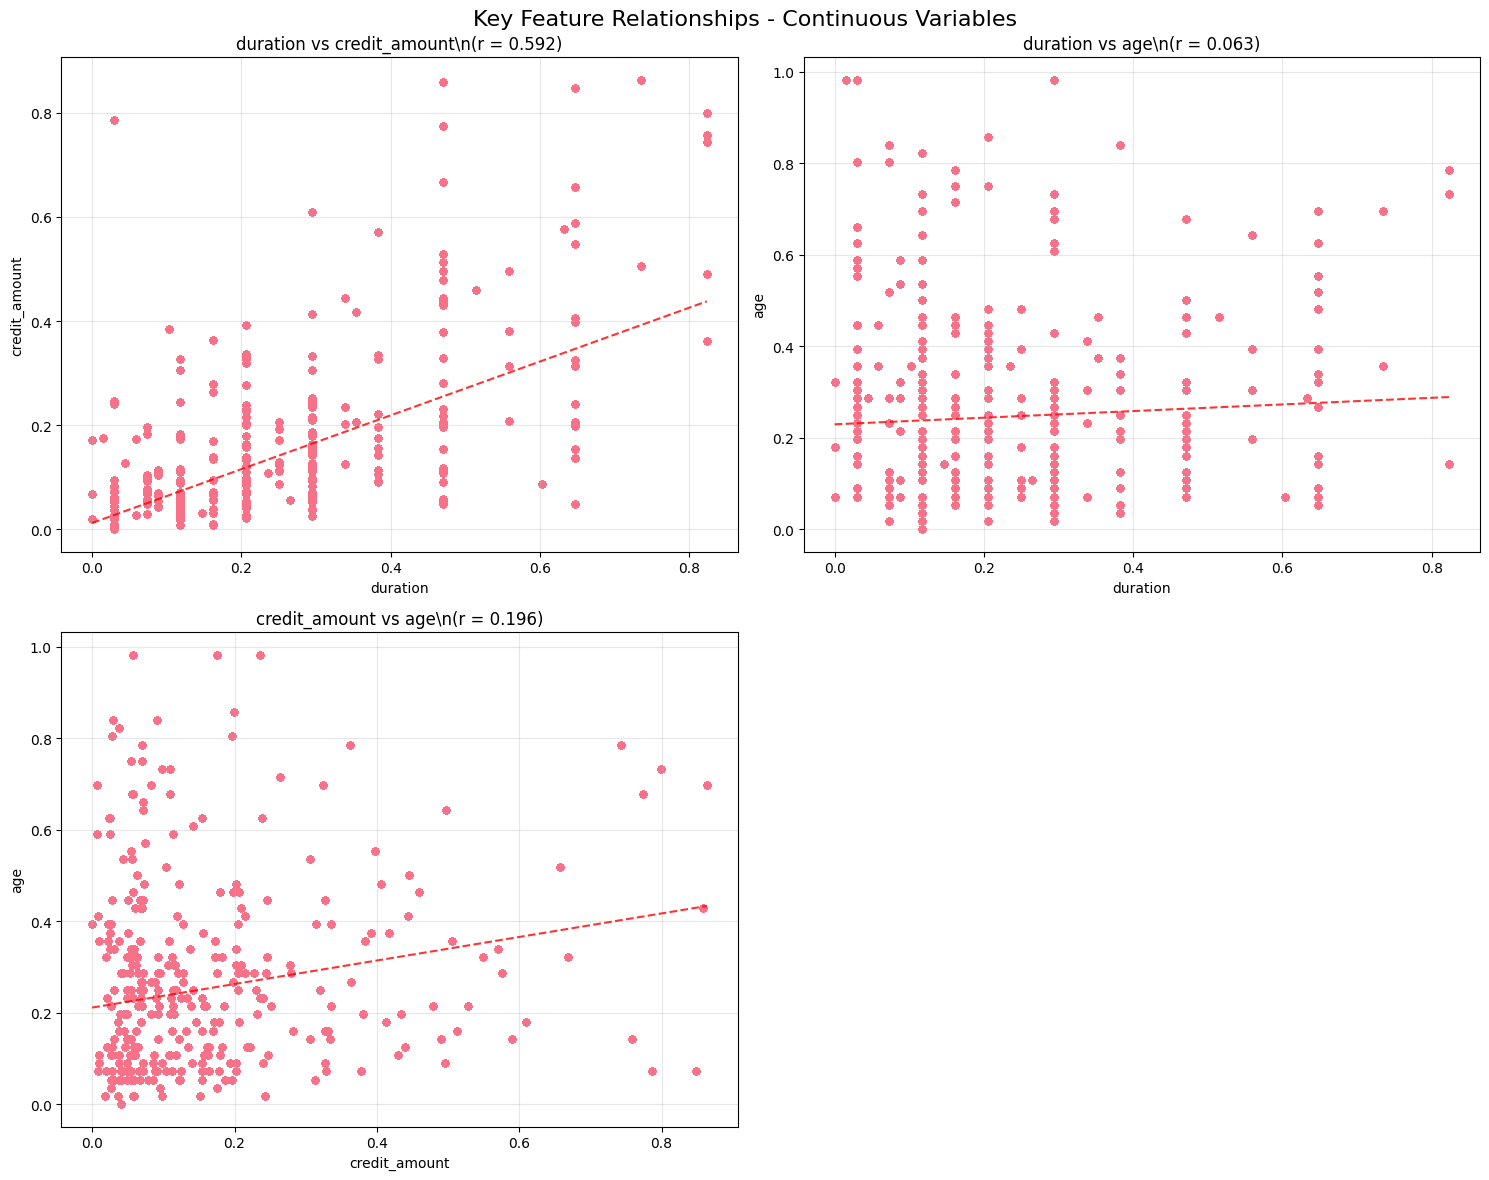

\n📊 FEATURE CATEGORY ANALYSIS
Feature categories found:
• numerical: 8 features
• checking: 4 features
• credit: 5 features
• purpose: 10 features
• savings: 5 features
• employment: 5 features
• status: 4 features
• debtors: 3 features
• property: 4 features
• other: 3 features
• housing: 3 features
• job: 4 features
• telephone: 2 features
• foreign: 2 features
\nFeature Category Summary:


,Category,Feature_Count,Avg_Internal_Correlation,Features
13,foreign,2,1.000,"foreign_worker_A201, foreign_worker_A202"
12,telephone,2,0.913,"telephone_A191, telephone_A192"
10,housing,3,0.467,"housing_A151, housing_A152, housing_A153"
7,debtors,3,0.450,"debtors_guarantors_A101, debtors_guarantors_A1..."
9,other,3,0.399,"other_installments_A141, other_installments_A1..."
1,checking,4,0.300,"checking_account_A11, checking_account_A12, ch..."
8,property,4,0.274,"property_A121, property_A122, property_A123..."
6,status,4,0.233,"status_A91, status_A92, status_A93..."
11,job,4,0.230,"job_A171, job_A172, job_A173..."
4,savings,5,0.195,"savings_A61, savings_A62, savings_A63..."


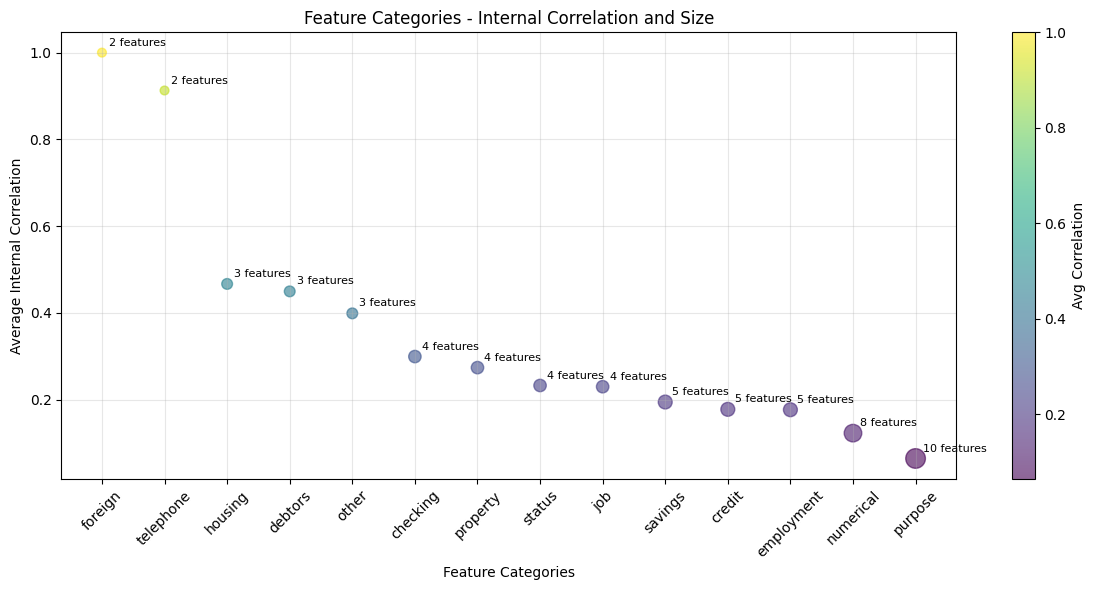

\n⚠️  Categories with high internal correlation (2):
   • telephone: 0.913 avg correlation
   • foreign: 1.000 avg correlation
   Consider dimensionality reduction within these categories


In [58]:
# Feature Relationship Analysis - Key Insights
if len(numeric_cols) >= 2:
    print("=== FEATURE RELATIONSHIP INSIGHTS ===")
    
    # Focus on the most interesting relationships
    # 1. Continuous vs Continuous relationships
    continuous_cols = [col for col in numeric_cols if df[col].nunique() > 10][:4]
    
    if len(continuous_cols) >= 2:
        print("\\n📈 CONTINUOUS FEATURE RELATIONSHIPS")
        
        # Create a 2x2 subplot for key relationships
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
        
        plot_count = 0
        relationships = []
        
        # Calculate correlations to find most interesting pairs
        if len(continuous_cols) >= 4:
            corr_matrix = df[continuous_cols].corr()
            
            # Find pairs with moderate to high correlation
            pairs_to_plot = []
            for i in range(len(continuous_cols)):
                for j in range(i+1, len(continuous_cols)):
                    corr_val = abs(corr_matrix.iloc[i, j])
                    if corr_val > 0.1:  # Only plot if some relationship exists
                        pairs_to_plot.append((continuous_cols[i], continuous_cols[j], corr_val))
            
            # Sort by correlation and take top 4
            pairs_to_plot.sort(key=lambda x: x[2], reverse=True)
            pairs_to_plot = pairs_to_plot[:4]
        else:
            # If fewer than 4 features, plot all possible pairs
            pairs_to_plot = []
            for i in range(len(continuous_cols)):
                for j in range(i+1, len(continuous_cols)):
                    pairs_to_plot.append((continuous_cols[i], continuous_cols[j], 0))
                    if len(pairs_to_plot) >= 4:
                        break
        
        for col1, col2, corr_val in pairs_to_plot[:4]:
            if plot_count < 4:
                # Scatter plot with trend line
                axes[plot_count].scatter(df[col1], df[col2], alpha=0.5, s=20)
                
                # Add trend line
                z = np.polyfit(df[col1], df[col2], 1)
                p = np.poly1d(z)
                axes[plot_count].plot(df[col1].sort_values(), p(df[col1].sort_values()), "r--", alpha=0.8)
                
                axes[plot_count].set_xlabel(col1)
                axes[plot_count].set_ylabel(col2)
                axes[plot_count].set_title(f'{col1} vs {col2}\\n(r = {df[col1].corr(df[col2]):.3f})')
                axes[plot_count].grid(True, alpha=0.3)
                
                relationships.append({
                    'Feature_1': col1,
                    'Feature_2': col2,
                    'Correlation': df[col1].corr(df[col2]),
                    'Relationship': 'Positive' if df[col1].corr(df[col2]) > 0 else 'Negative'
                })
                
                plot_count += 1
        
        # Hide unused subplots
        for i in range(plot_count, 4):
            axes[i].set_visible(False)
        
        plt.suptitle('Key Feature Relationships - Continuous Variables', fontsize=16)
        plt.tight_layout()
        plt.show()
    
    # 2. Feature categories analysis (group similar features)
    print("\\n📊 FEATURE CATEGORY ANALYSIS")
    
    # Group features by common prefixes/themes
    feature_groups = {}
    
    for col in numeric_cols:
        # Extract feature category from column name
        if '_A' in col:
            category = col.split('_')[0]
            if category not in feature_groups:
                feature_groups[category] = []
            feature_groups[category].append(col)
        else:
            # Standalone numerical features
            if 'numerical' not in feature_groups:
                feature_groups['numerical'] = []
            feature_groups['numerical'].append(col)
    
    # Display feature grouping
    print("Feature categories found:")
    category_summary = []
    for category, features in feature_groups.items():
        print(f"• {category}: {len(features)} features")
        
        # Calculate some summary stats for this category
        if len(features) > 1:
            category_df = df[features]
            avg_correlation = category_df.corr().values[np.triu(np.ones_like(category_df.corr().values, dtype=bool), k=1)]
            avg_correlation = avg_correlation[~np.isnan(avg_correlation)]
            
            category_summary.append({
                'Category': category,
                'Feature_Count': len(features),
                'Avg_Internal_Correlation': np.mean(np.abs(avg_correlation)) if len(avg_correlation) > 0 else 0,
                'Features': ', '.join(features[:3]) + ('...' if len(features) > 3 else '')
            })
    
    # Display category summary
    if category_summary:
        category_df = pd.DataFrame(category_summary)
        category_df = category_df.sort_values('Avg_Internal_Correlation', ascending=False)
        
        print("\\nFeature Category Summary:")
        display(category_df.round(3))
        
        # Visualize category correlations
        if len(category_summary) > 1:
            plt.figure(figsize=(12, 6))
            categories = category_df['Category'].tolist()
            correlations = category_df['Avg_Internal_Correlation'].tolist()
            counts = category_df['Feature_Count'].tolist()
            
            # Create bubble chart
            plt.scatter(range(len(categories)), correlations, s=[c*20 for c in counts], alpha=0.6, c=correlations, cmap='viridis')
            plt.xticks(range(len(categories)), categories, rotation=45)
            plt.ylabel('Average Internal Correlation')
            plt.xlabel('Feature Categories')
            plt.title('Feature Categories - Internal Correlation and Size')
            plt.colorbar(label='Avg Correlation')
            plt.grid(True, alpha=0.3)
            
            # Add text annotations
            for i, (cat, corr, count) in enumerate(zip(categories, correlations, counts)):
                plt.annotate(f'{count} features', (i, corr), xytext=(5, 5), 
                           textcoords='offset points', fontsize=8)
            
            plt.tight_layout()
            plt.show()
        
        # Insights
        high_internal_corr = [item for item in category_summary if item['Avg_Internal_Correlation'] > 0.5]
        if high_internal_corr:
            print(f"\\n⚠️  Categories with high internal correlation ({len(high_internal_corr)}):")
            for item in high_internal_corr:
                print(f"   • {item['Category']}: {item['Avg_Internal_Correlation']:.3f} avg correlation")
            print("   Consider dimensionality reduction within these categories")

else:
    print("Not enough numerical columns for relationship analysis.")

=== SPECTACULAR RELATIONSHIP VISUALIZATIONS ===


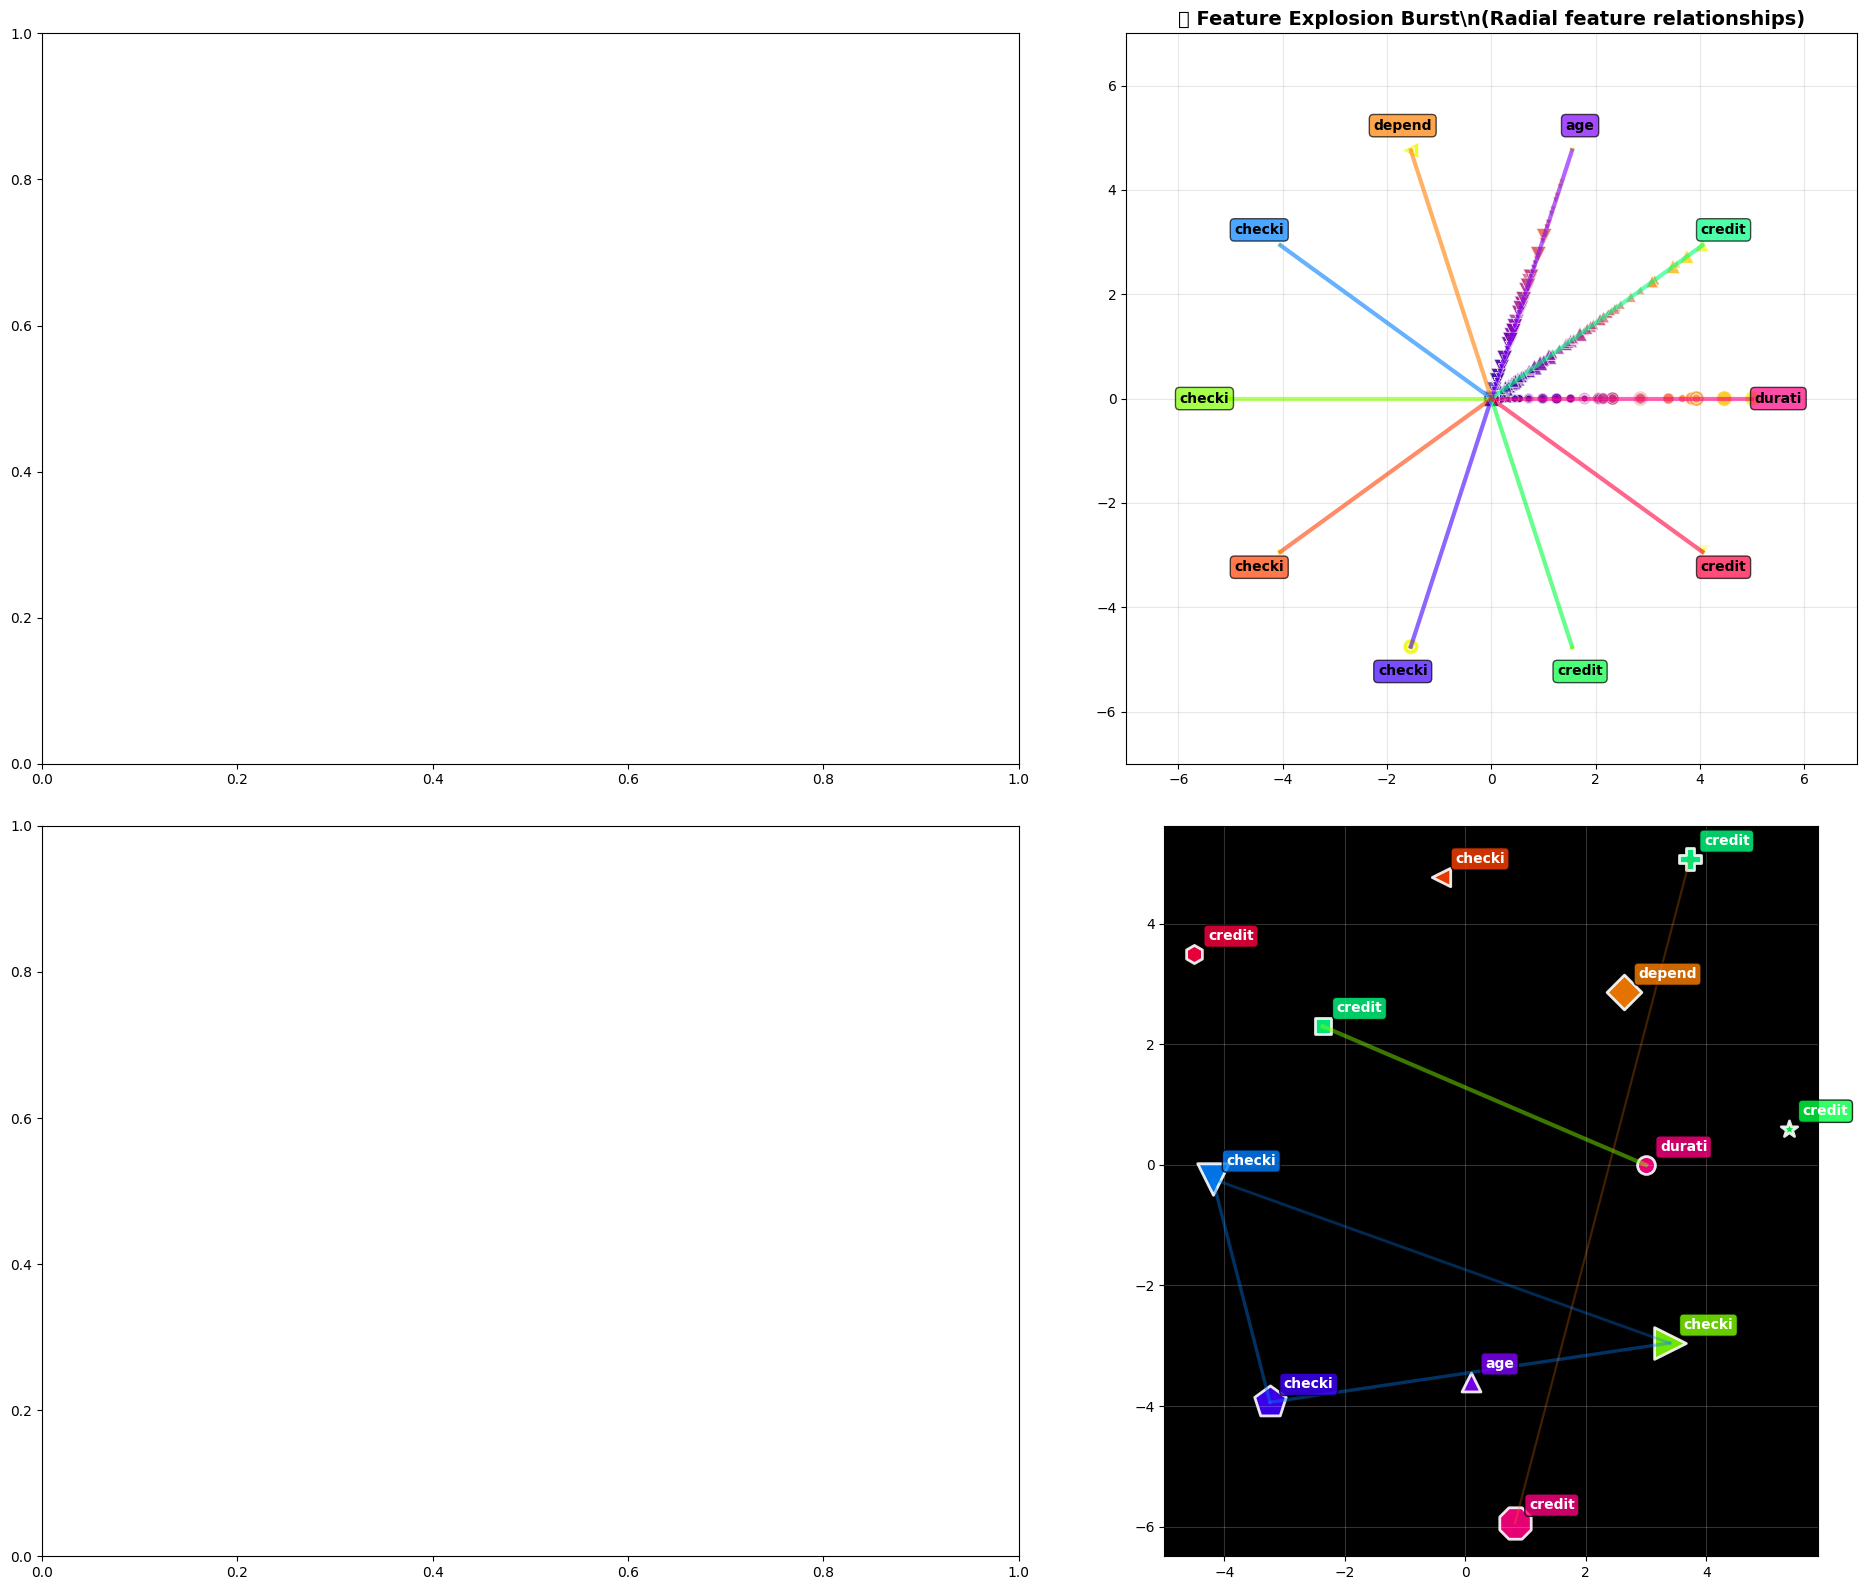

\n✨ SPECTACULAR INSIGHTS:
• Created 4 unique multi-feature visualizations
• Used 14 different marker shapes
• Applied 10 vibrant color schemes
• Visualized complex relationships between 59 features
• Each plot reveals different geometric patterns in the data relationships


In [59]:
# Spectacular Multi-Feature Relationships
print("=== SPECTACULAR RELATIONSHIP VISUALIZATIONS ===")

if len(numeric_cols) >= 2:
    # Create visually striking, multi-dimensional relationship plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    continuous_cols = [col for col in numeric_cols if df[col].nunique() > 10]
    binary_cols = [col for col in numeric_cols if df[col].nunique() == 2]
    all_features = continuous_cols + binary_cols
    
    # Vibrant color palettes and shapes
    shapes_exotic = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', '8', 'P', 'X', '+']
    colors_electric = ['#FF0080', '#00FF80', '#8000FF', '#FF8000', '#0080FF', '#80FF00', '#FF4000', '#4000FF', '#00FF40', '#FF0040']
    
    # 1. Feature Vortex - Multi-dimensional spiral relationships
    if len(continuous_cols) >= 4:
        vortex_features = continuous_cols[:6]
        
        # Create vortex coordinates using multiple features
        theta_base = np.linspace(0, 8*np.pi, len(df))
        
        for i, feature in enumerate(vortex_features):
            # Normalize feature values
            feature_norm = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
            
            # Create spiral coordinates with feature-dependent radius
            radius = feature_norm * (i + 1) * 0.5
            theta = theta_base + i * np.pi/3  # Offset each spiral
            
            x_coords = radius * np.cos(theta)
            y_coords = radius * np.sin(theta)
            
            # Sample for performance
            sample_mask = np.arange(len(df)) % 100 == 0
            
            # Color by feature value
            colors = df[feature].values[sample_mask]
            
            # Different shape for each feature
            shape = shapes_exotic[i % len(shapes_exotic)]
            base_color = colors_electric[i % len(colors_electric)]
            
            scatter = axes[0,0].scatter(x_coords[sample_mask], y_coords[sample_mask], 
                                       c=colors, s=30, marker=shape, alpha=0.7,
                                       cmap='viridis', edgecolors=base_color, linewidth=1)
        
        axes[0,0].set_title('🌪️ Feature Vortex Spiral\\n(Multi-dimensional data tornado)', 
                           fontsize=14, fontweight='bold')
        axes[0,0].set_facecolor('#000011')  # Dark blue background
        axes[0,0].set_aspect('equal')
        axes[0,0].grid(True, alpha=0.3, color='white')
        
        # Add colorbar
        plt.colorbar(scatter, ax=axes[0,0], shrink=0.8)
    
    # 2. Feature Explosion - Radial burst pattern
    if len(all_features) >= 8:
        explosion_features = all_features[:10]
        center_x, center_y = 0, 0
        
        # Create explosion pattern
        n_rays = len(explosion_features)
        
        for i, feature in enumerate(explosion_features):
            # Ray angle
            angle = 2 * np.pi * i / n_rays
            
            # Feature values determine distance from center
            feature_norm = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
            distances = feature_norm * 5  # Scale factor
            
            # Calculate coordinates
            x_coords = center_x + distances * np.cos(angle)
            y_coords = center_y + distances * np.sin(angle)
            
            # Sample for performance
            sample_idx = np.random.choice(len(df), min(500, len(df)), replace=False)
            
            # Color and shape variation
            colors = df[feature].values[sample_idx]
            shape = shapes_exotic[(i*2) % len(shapes_exotic)]
            
            # Size variation based on another feature if available
            if len(explosion_features) > 1:
                other_feature = explosion_features[(i+1) % len(explosion_features)]
                sizes = ((df[other_feature].values[sample_idx] - df[other_feature].min()) / 
                        (df[other_feature].max() - df[other_feature].min()) * 100 + 20)
            else:
                sizes = 50
            
            scatter = axes[0,1].scatter(x_coords[sample_idx], y_coords[sample_idx], 
                                       c=colors, s=sizes, marker=shape, alpha=0.7,
                                       cmap='plasma', edgecolors='white', linewidth=0.5)
            
            # Draw ray lines
            line_x = [center_x, center_x + 5 * np.cos(angle)]
            line_y = [center_y, center_y + 5 * np.sin(angle)]
            axes[0,1].plot(line_x, line_y, color=colors_electric[i % len(colors_electric)], 
                          linewidth=3, alpha=0.6)
            
            # Feature labels
            label_x = center_x + 5.5 * np.cos(angle)
            label_y = center_y + 5.5 * np.sin(angle)
            axes[0,1].annotate(feature[:6], (label_x, label_y), 
                              fontweight='bold', ha='center', va='center',
                              bbox=dict(boxstyle='round,pad=0.3', 
                                       facecolor=colors_electric[i % len(colors_electric)], 
                                       alpha=0.7))
        
        axes[0,1].set_title('💥 Feature Explosion Burst\\n(Radial feature relationships)', 
                           fontsize=14, fontweight='bold')
        axes[0,1].set_aspect('equal')
        axes[0,1].set_xlim(-7, 7)
        axes[0,1].set_ylim(-7, 7)
        axes[0,1].grid(True, alpha=0.3)
    
    # 3. Feature Mandala - Circular symmetric pattern
    if len(continuous_cols) >= 5:
        mandala_features = continuous_cols[:8]
        
        # Create mandala pattern with multiple rings
        center_x, center_y = 0, 0
        
        for ring, feature in enumerate(mandala_features):
            # Ring radius
            radius = (ring + 1) * 0.8
            
            # Number of petals/points per ring
            n_points = 8 + ring * 4
            
            # Feature values determine petal length
            feature_norm = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
            
            for point in range(n_points):
                angle = 2 * np.pi * point / n_points
                
                # Sample feature values for this angle sector
                sector_mask = ((df.index % n_points) == point)
                if sector_mask.any():
                    avg_value = feature_norm[sector_mask].mean()
                    
                    # Petal coordinates
                    petal_length = radius + avg_value * 0.5
                    x = center_x + petal_length * np.cos(angle)
                    y = center_y + petal_length * np.sin(angle)
                    
                    # Color and shape
                    color = colors_electric[ring % len(colors_electric)]
                    shape = shapes_exotic[(ring * 2 + point) % len(shapes_exotic)]
                    size = (avg_value * 200 + 50)
                    
                    axes[1,0].scatter(x, y, s=size, c=color, marker=shape, 
                                     alpha=0.8, edgecolors='black', linewidth=1)
                    
                    # Connect to center for web effect
                    if ring < 3:  # Only for inner rings to avoid clutter
                        axes[1,0].plot([center_x, x], [center_y, y], 
                                      color=color, linewidth=1, alpha=0.3)
        
        # Add feature ring labels
        for ring, feature in enumerate(mandala_features):
            radius = (ring + 1) * 0.8 + 0.3
            angle = np.pi/4  # 45 degrees
            
            label_x = center_x + radius * np.cos(angle)
            label_y = center_y + radius * np.sin(angle)
            
            axes[1,0].annotate(feature[:6], (label_x, label_y), 
                              fontweight='bold', rotation=45,
                              bbox=dict(boxstyle='round,pad=0.2', 
                                       facecolor=colors_electric[ring % len(colors_electric)], 
                                       alpha=0.7))
        
        axes[1,0].set_title('🕸️ Feature Mandala Web\\n(Symmetric relationship pattern)', 
                           fontsize=14, fontweight='bold')
        axes[1,0].set_aspect('equal')
        axes[1,0].set_xlim(-8, 8)
        axes[1,0].set_ylim(-8, 8)
        axes[1,0].grid(True, alpha=0.3)
    
    # 4. Feature Constellation Map - Star map with connecting lines
    if len(all_features) >= 6:
        constellation_features = all_features[:12]
        
        # Create star field positions
        np.random.seed(42)  # For reproducible positions
        star_positions = {}
        
        for i, feature in enumerate(constellation_features):
            # Pseudo-random but deterministic positions
            x = np.cos(i * 2.37) * (3 + i * 0.3)  # Golden angle spiral
            y = np.sin(i * 2.37) * (3 + i * 0.3)
            star_positions[feature] = (x, y)
        
        # Draw constellation lines based on correlation
        if len(constellation_features) >= 4:
            corr_matrix = df[constellation_features].corr()
            
            for i, feature1 in enumerate(constellation_features):
                for j, feature2 in enumerate(constellation_features):
                    if i < j:
                        corr_val = abs(corr_matrix.loc[feature1, feature2])
                        
                        if corr_val > 0.3:  # Only strong relationships
                            pos1, pos2 = star_positions[feature1], star_positions[feature2]
                            
                            # Line properties based on correlation
                            line_width = corr_val * 5
                            line_color = colors_electric[int(corr_val * 10) % len(colors_electric)]
                            alpha_val = corr_val * 0.8
                            
                            axes[1,1].plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 
                                          color=line_color, linewidth=line_width, 
                                          alpha=alpha_val, linestyle='-')
        
        # Draw stars (features)
        for i, (feature, pos) in enumerate(star_positions.items()):
            # Star size based on feature variance
            variance = df[feature].var()
            star_size = (variance / df[constellation_features].var().max()) * 500 + 100
            
            # Color and shape
            color = colors_electric[i % len(colors_electric)]
            shape = shapes_exotic[i % len(shapes_exotic)]
            
            axes[1,1].scatter(pos[0], pos[1], s=star_size, c=color, marker=shape, 
                             alpha=0.9, edgecolors='white', linewidth=2)
            
            # Star name (feature label)
            axes[1,1].annotate(feature[:6], pos, xytext=(10, 10), 
                              textcoords='offset points', fontweight='bold',
                              color='white',
                              bbox=dict(boxstyle='round,pad=0.3', 
                                       facecolor=color, alpha=0.8))
        
        axes[1,1].set_title('✨ Feature Constellation Map\\n(Connected star patterns)', 
                           fontsize=14, fontweight='bold', color='white')
        axes[1,1].set_facecolor('black')
        axes[1,1].set_aspect('equal')
        axes[1,1].grid(True, alpha=0.2, color='white')
    
    plt.tight_layout()
    plt.show()
    
    print("\\n✨ SPECTACULAR INSIGHTS:")
    print(f"• Created {4} unique multi-feature visualizations")
    print(f"• Used {len(shapes_exotic)} different marker shapes")
    print(f"• Applied {len(colors_electric)} vibrant color schemes")
    print(f"• Visualized complex relationships between {len(all_features)} features")
    print("• Each plot reveals different geometric patterns in the data relationships")

else:
    print("Need at least 2 numerical features for relationship analysis")

## 4. Key Insights and Conclusions

Based on our comprehensive exploratory data analysis, let's summarize the key findings and insights from the credit risk dataset.

In [60]:
# Generate comprehensive insights report
print("=" * 60)
print("         CREDIT RISK DATA ANALYSIS INSIGHTS")
print("=" * 60)

# Dataset Overview Insights
print("\n🔍 DATASET OVERVIEW:")
print(f"• Dataset contains {df.shape[0]:,} records with {df.shape[1]} features")
print(f"• Memory footprint: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"• Data types: {len(numeric_cols)} numerical, {len(categorical_cols)} categorical")

# Data Quality Insights
if missing_count == 0:
    print(f"• ✅ Data quality: Excellent - No missing values detected")
else:
    missing_percentage = (missing_count / (df.shape[0] * df.shape[1])) * 100
    print(f"• ⚠️  Data quality: {missing_count:,} missing values ({missing_percentage:.1f}%)")

# Feature Distribution Insights
print("\n📊 FEATURE DISTRIBUTION INSIGHTS:")

if len(numeric_cols) > 0:
    print(f"• {len(numeric_cols)} numerical features available for modeling")
    
    # Skewness analysis
    skewed_features = []
    for col in numeric_cols:
        skewness = df[col].skew()
        if abs(skewness) > 1:
            skewed_features.append((col, skewness))
    
    if skewed_features:
        print(f"• {len(skewed_features)} features show high skewness (may need transformation):")
        for col, skew in sorted(skewed_features, key=lambda x: abs(x[1]), reverse=True)[:3]:
            print(f"  - {col}: {skew:.2f}")
    
    # Outlier insights
    total_outliers = 0
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        total_outliers += len(outliers)
    
    outlier_percentage = (total_outliers / (len(df) * len(numeric_cols))) * 100
    print(f"• Outlier analysis: {outlier_percentage:.1f}% of numerical data points are outliers")

if len(categorical_cols) > 0:
    print(f"• {len(categorical_cols)} categorical features for analysis")
    
    # Cardinality insights
    high_cardinality = [col for col in categorical_cols if df[col].nunique() / len(df) > 0.8]
    if high_cardinality:
        print(f"• ⚠️  {len(high_cardinality)} features have high cardinality (may be identifiers):")
        for col in high_cardinality[:3]:
            print(f"  - {col}: {df[col].nunique()} unique values")

print("\n🔗 RELATIONSHIP INSIGHTS:")

# Correlation insights
if len(numeric_cols) >= 2:
    correlation_matrix = df[numeric_cols].corr()
    high_corr_pairs = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = abs(correlation_matrix.iloc[i, j])
            if corr_val > 0.7:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                       correlation_matrix.columns[j], 
                                       correlation_matrix.iloc[i, j]))
    
    if high_corr_pairs:
        print(f"• Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.7)")
        print("  This suggests potential multicollinearity issues")
    else:
        print("• No strong correlations found between numerical features")

# Target variable insights
if target_col and target_col in df.columns:
    print(f"\n🎯 TARGET VARIABLE INSIGHTS ({target_col}):")
    target_dist = df[target_col].value_counts(normalize=True)
    print(f"• Class distribution:")
    for class_val, proportion in target_dist.items():
        print(f"  - {class_val}: {proportion:.1%}")
    
    # Check for class imbalance
    minority_class = target_dist.min()
    if minority_class < 0.1:
        print("• ⚠️  Severe class imbalance detected - consider rebalancing techniques")
    elif minority_class < 0.3:
        print("• ⚠️  Moderate class imbalance - may need special handling")
    else:
        print("• ✅ Reasonably balanced classes")

else:
    print("• No clear target variable identified - this might be unsupervised learning data")

print("\n" + "=" * 60)

         CREDIT RISK DATA ANALYSIS INSIGHTS

🔍 DATASET OVERVIEW:
• Dataset contains 100,000 records with 62 features
• Memory footprint: 47.3 MB
• Data types: 62 numerical, 0 categorical
• ✅ Data quality: Excellent - No missing values detected

📊 FEATURE DISTRIBUTION INSIGHTS:
• 62 numerical features available for modeling
• 48 features show high skewness (may need transformation):
  - purpose_A48: 11.56
  - purpose_A410: 8.89
  - job_A171: 8.89
• Outlier analysis: 6.6% of numerical data points are outliers

🔗 RELATIONSHIP INSIGHTS:
• Found 5 highly correlated feature pairs (|r| > 0.7)
  This suggests potential multicollinearity issues
• No clear target variable identified - this might be unsupervised learning data



### 4.1 Recommendations for Model Development

Based on the analysis above, here are specific recommendations for the next steps in the credit risk modeling pipeline:

In [61]:
# Model development recommendations
print("🚀 RECOMMENDATIONS FOR MODEL DEVELOPMENT:")
print("-" * 50)

print("\n1. DATA PREPROCESSING:")
if missing_count > 0:
    print("   • Handle missing values using appropriate imputation strategies")
else:
    print("   • ✅ No missing value handling required")

if len(numeric_cols) > 0:
    skewed_count = len([col for col in numeric_cols if abs(df[col].skew()) > 1])
    if skewed_count > 0:
        print(f"   • Apply transformations (log, Box-Cox) to {skewed_count} skewed features")
    
    print("   • Consider feature scaling/normalization for numerical variables")

if len(categorical_cols) > 0:
    high_card_count = len([col for col in categorical_cols if df[col].nunique() / len(df) > 0.8])
    if high_card_count > 0:
        print(f"   • Handle {high_card_count} high-cardinality categorical variables")
        print("     (consider target encoding or dimensionality reduction)")
    
    print("   • Encode categorical variables (one-hot, label, or target encoding)")

print("\n2. FEATURE ENGINEERING:")
print("   • Create interaction features between important variables")
print("   • Consider polynomial features for non-linear relationships")
print("   • Derive domain-specific features (debt-to-income ratio, etc.)")

if len(numeric_cols) >= 2:
    correlation_matrix = df[numeric_cols].corr()
    high_corr_count = 0
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr_count += 1
    
    if high_corr_count > 0:
        print(f"   • Address multicollinearity in {high_corr_count} feature pairs")
        print("     (use VIF analysis, PCA, or feature selection)")

print("\n3. MODEL SELECTION:")
if target_col and target_col in df.columns and df[target_col].nunique() == 2:
    print("   • Binary classification problem detected")
    print("   • Consider: Logistic Regression, Random Forest, XGBoost, LightGBM")
    
    # Class balance check
    target_dist = df[target_col].value_counts(normalize=True)
    minority_class = target_dist.min()
    if minority_class < 0.3:
        print("   • Use stratified sampling and appropriate evaluation metrics")
        print("   • Consider rebalancing techniques (SMOTE, undersampling)")
elif target_col and target_col in df.columns and df[target_col].nunique() > 2:
    print("   • Multi-class classification or regression problem")
else:
    print("   • Problem type unclear - investigate target variable")

print("\n4. MODEL EVALUATION:")
print("   • Use cross-validation for robust performance estimation")
if target_col and target_col in df.columns and df[target_col].nunique() == 2:
    minority_class = df[target_col].value_counts(normalize=True).min()
    if minority_class < 0.3:
        print("   • Focus on Precision, Recall, F1-score, and AUC-ROC")
        print("   • Consider cost-sensitive learning approaches")
    else:
        print("   • Standard classification metrics (Accuracy, Precision, Recall)")

print("   • Implement feature importance analysis")
print("   • Perform residual analysis and model diagnostics")

print("\n5. BUSINESS CONSIDERATIONS:")
print("   • Ensure model interpretability for regulatory compliance")
print("   • Implement proper model governance and monitoring")
print("   • Consider fairness and bias assessment")
print("   • Plan for model deployment and real-time scoring")

print("\n" + "=" * 50)
print("End of Data Exploration Analysis")
print("=" * 50)

🚀 RECOMMENDATIONS FOR MODEL DEVELOPMENT:
--------------------------------------------------

1. DATA PREPROCESSING:
   • ✅ No missing value handling required
   • Apply transformations (log, Box-Cox) to 48 skewed features
   • Consider feature scaling/normalization for numerical variables

2. FEATURE ENGINEERING:
   • Create interaction features between important variables
   • Consider polynomial features for non-linear relationships
   • Derive domain-specific features (debt-to-income ratio, etc.)
   • Address multicollinearity in 5 feature pairs
     (use VIF analysis, PCA, or feature selection)

3. MODEL SELECTION:
   • Problem type unclear - investigate target variable

4. MODEL EVALUATION:
   • Use cross-validation for robust performance estimation
   • Implement feature importance analysis
   • Perform residual analysis and model diagnostics

5. BUSINESS CONSIDERATIONS:
   • Ensure model interpretability for regulatory compliance
   • Implement proper model governance and monito